<h1><center> Predicting which Customers will Purchase a Quoted Insurance Plan? </center></h1>

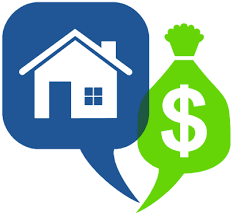

# 1. Business/Real-World Problem

## 1.1 Description

- Before asking someone on a date or skydiving, it's important to know your likelihood of success. The same goes for quoting home insurance prices to a potential customer. Homesite, a leading provider of homeowners insurance, does not currently have a dynamic conversion rate model that can give them confidence a quoted price will lead to a purchase. 
---
- Using an anonymized database of information on customer and sales activity, including property and coverage information, Homesite is challenging you to predict which customers will purchase a given quote. Accurately predicting conversion would help Homesite better understand the impact of proposed pricing changes and maintain an ideal portfolio of customer segments. 

### Problem Statement

1. Being able to target those customers that are interested in buying policies from an insurance company and that are more likely to buy the product can lead to an increase in the conversion rate

2. Homesite's intention to optimize the process of providing home insurance quotes to potential customers, whereby they aim to build a model that can achieve the highest possible conversion rate.

3. So, as a Data Scientist, We neet to predict/forecast whether a quote given by Homesite to a customer will result in successful conversion or not.

## 1.2 Source of the Data

**Source** : https://www.kaggle.com/competitions/homesite-quote-conversion/


## 1.3 Real World/Business Objectives and Constraints

1. **Latency requirement** : We do not need to predict whether a quote given to customer will result in successful conversion in milliseconds but it should not exceed for more than few minutes.

2. **Effect of misclassification** : The cost of misclassification will be very high.

3. **Interpretability** : High interpretability of the model is desirable since it will aid management in understanding which variables that are affected the model's decision on a successful conversion.

4. Probability of a data-point belonging to each class is needed.

---

# 2. Machine Learning Problem

## 2.1 Data

### 2.1.1 Data Overview

- Data will be in a file Train.csv
- Train.csv contains 299 columns
- Size of the Train.csv - 197 MB
- Number of rows in Train.csv - 2,60,753

## 2.2 Mapping the Real World Problem to ML Problem

### 2.2.1 Type of Machine Learning problem

It is a binary classification problem, and our task is to predict the QuoteConversion_Flag for the given QuoteNumber

### 2.2.2 Performance Metrics

- AUC Score
- F1 Score
- Confusion Matrix
- Log Loss

### 2.2.3 Train and Test Construction

As the features are NON-TEMPORAL in nature so, we employ Random Splitting Strategy.

---

# 3. Data Acquisition

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import optuna
from xgboost import XGBRegressor
import xgbfir
from prettytable import PrettyTable

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Training Data
d_tr= pd.read_csv(r'C:\Users\SVF\Downloads\Homesite_Quote_Conversion/train.csv')
d_tr.head()

,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,CoverageField8,CoverageField9,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField7,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,SalesField13,SalesField14,SalesField15,PersonalField1,PersonalField2,PersonalField4A,PersonalField4B,PersonalField5,PersonalField6,PersonalField7,PersonalField8,PersonalField9,PersonalField10A,PersonalField10B,PersonalField11,PersonalField12,PersonalField13,PersonalField14,PersonalField15,PersonalField16,PersonalField17,PersonalField18,PersonalField19,PersonalField22,PersonalField23,PersonalField24,PersonalField25,PersonalField26,PersonalField27,PersonalField28,PersonalField29,PersonalField30,PersonalField31,PersonalField32,PersonalField33,PersonalField34,PersonalField35,PersonalField36,PersonalField37,PersonalField38,PersonalField39,PersonalField40,PersonalField41,PersonalField42,PersonalField43,PersonalField44,PersonalField45,PersonalField46,PersonalField47,PersonalField48,PersonalField49,PersonalField50,PersonalField51,PersonalField52,PersonalField53,PersonalField54,PersonalField55,PersonalField56,PersonalField57,PersonalField58,PersonalField59,PersonalField60,PersonalField61,PersonalField62,PersonalField63,PersonalField64,PersonalField65,PersonalField66,PersonalField67,PersonalField68,PersonalField69,PersonalField70,PersonalField71,PersonalField72,PersonalField73,PersonalField74,PersonalField75,PersonalField76,PersonalField77,PersonalField78,PersonalField79,PersonalField80,PersonalField81,PersonalField82,PersonalField83,PersonalField84,PropertyField1A,PropertyField1B,PropertyField2A,PropertyField2B,PropertyField3,PropertyField4,PropertyField5,PropertyField6,PropertyField7,PropertyField8,PropertyField9,PropertyField10,PropertyField11A,PropertyField11B,PropertyField12,PropertyField13,PropertyField14,PropertyField15,PropertyField16A,PropertyField16B,PropertyField17,PropertyField18,PropertyField19,PropertyField20,PropertyField21A,PropertyField21B,PropertyField22,PropertyField23,PropertyField24A,PropertyField24B,PropertyField25,PropertyField26A,PropertyField26B,PropertyField27,PropertyField28,PropertyField29,PropertyField30,PropertyField31,PropertyField32,PropertyField33,PropertyField34,PropertyField35,PropertyField36,PropertyField37,PropertyField38,PropertyField39A,PropertyField39B,GeographicField1A,GeographicField1B,GeographicField2A,GeographicField2B,GeographicField3A,GeographicField3B,GeographicField4A,GeographicField4B,GeographicField5A,GeographicField5B,GeographicField6A,GeographicField6B,GeographicField7A,GeographicField7B,GeographicField8A,GeographicField8B,GeographicField9A,GeographicField9B,GeographicField10A,GeographicField10B,GeographicField11A,GeographicField11B,GeographicField12A,GeographicField12B,GeographicField13A,GeographicField13B,GeographicField14A,GeographicField14B,GeographicField15A,GeographicField15B,GeographicField16A,GeographicField16B,GeographicField17A,GeographicField17B,GeographicField18A,GeographicField18B,GeographicField19A,GeographicField19B,GeographicField20A,GeographicField20B,GeographicField21A,GeographicField21B,GeographicField22A,GeographicField22B,GeographicField23A,GeographicField23B,GeographicField24A,GeographicField24B,GeographicField25A,GeographicField25B,GeographicField26A,GeographicField26B,GeographicField27A,GeographicField27B,GeographicField28A,GeographicField28B,GeographicField29A,GeographicField29B,GeographicField30A,GeographicField30B,GeographicField31A,GeographicField31B,GeographicField32A,GeographicField32B,GeographicField33A,GeographicField33B,GeographicField34A,GeographicField34B,GeographicField35A,GeographicField35B,GeographicField36A,GeographicFie

In [3]:
# Test Data
d_te = pd.read_csv(r'C:\Users\SVF\Downloads\Homesite_Quote_Conversion/test.csv')
d_te.head()

,QuoteNumber,Original_Quote_Date,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,CoverageField8,CoverageField9,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField7,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,SalesField13,SalesField14,SalesField15,PersonalField1,PersonalField2,PersonalField4A,PersonalField4B,PersonalField5,PersonalField6,PersonalField7,PersonalField8,PersonalField9,PersonalField10A,PersonalField10B,PersonalField11,PersonalField12,PersonalField13,PersonalField14,PersonalField15,PersonalField16,PersonalField17,PersonalField18,PersonalField19,PersonalField22,PersonalField23,PersonalField24,PersonalField25,PersonalField26,PersonalField27,PersonalField28,PersonalField29,PersonalField30,PersonalField31,PersonalField32,PersonalField33,PersonalField34,PersonalField35,PersonalField36,PersonalField37,PersonalField38,PersonalField39,PersonalField40,PersonalField41,PersonalField42,PersonalField43,PersonalField44,PersonalField45,PersonalField46,PersonalField47,PersonalField48,PersonalField49,PersonalField50,PersonalField51,PersonalField52,PersonalField53,PersonalField54,PersonalField55,PersonalField56,PersonalField57,PersonalField58,PersonalField59,PersonalField60,PersonalField61,PersonalField62,PersonalField63,PersonalField64,PersonalField65,PersonalField66,PersonalField67,PersonalField68,PersonalField69,PersonalField70,PersonalField71,PersonalField72,PersonalField73,PersonalField74,PersonalField75,PersonalField76,PersonalField77,PersonalField78,PersonalField79,PersonalField80,PersonalField81,PersonalField82,PersonalField83,PersonalField84,PropertyField1A,PropertyField1B,PropertyField2A,PropertyField2B,PropertyField3,PropertyField4,PropertyField5,PropertyField6,PropertyField7,PropertyField8,PropertyField9,PropertyField10,PropertyField11A,PropertyField11B,PropertyField12,PropertyField13,PropertyField14,PropertyField15,PropertyField16A,PropertyField16B,PropertyField17,PropertyField18,PropertyField19,PropertyField20,PropertyField21A,PropertyField21B,PropertyField22,PropertyField23,PropertyField24A,PropertyField24B,PropertyField25,PropertyField26A,PropertyField26B,PropertyField27,PropertyField28,PropertyField29,PropertyField30,PropertyField31,PropertyField32,PropertyField33,PropertyField34,PropertyField35,PropertyField36,PropertyField37,PropertyField38,PropertyField39A,PropertyField39B,GeographicField1A,GeographicField1B,GeographicField2A,GeographicField2B,GeographicField3A,GeographicField3B,GeographicField4A,GeographicField4B,GeographicField5A,GeographicField5B,GeographicField6A,GeographicField6B,GeographicField7A,GeographicField7B,GeographicField8A,GeographicField8B,GeographicField9A,GeographicField9B,GeographicField10A,GeographicField10B,GeographicField11A,GeographicField11B,GeographicField12A,GeographicField12B,GeographicField13A,GeographicField13B,GeographicField14A,GeographicField14B,GeographicField15A,GeographicField15B,GeographicField16A,GeographicField16B,GeographicField17A,GeographicField17B,GeographicField18A,GeographicField18B,GeographicField19A,GeographicField19B,GeographicField20A,GeographicField20B,GeographicField21A,GeographicField21B,GeographicField22A,GeographicField22B,GeographicField23A,GeographicField23B,GeographicField24A,GeographicField24B,GeographicField25A,GeographicField25B,GeographicField26A,GeographicField26B,GeographicField27A,GeographicField27B,GeographicField28A,GeographicField28B,GeographicField29A,GeographicField29B,GeographicField30A,GeographicField30B,GeographicField31A,GeographicField31B,GeographicField32A,GeographicField32B,GeographicField33A,GeographicField33B,GeographicField34A,GeographicField34B,GeographicField35A,GeographicField35B,GeographicField36A,GeographicField36B,GeographicField

---

# 4. Exploratory Data Analysis (EDA)

In [4]:
d_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260753 entries, 0 to 260752
Columns: 299 entries, QuoteNumber to GeographicField64
dtypes: float64(6), int64(265), object(28)
memory usage: 594.8+ MB


- 265 features have integers value, only 6 features have float values and remaining 28 features have categorical values 

## 4.1 Distribution of data points among output classes

<AxesSubplot:xlabel='Quote Conversion Flag'>

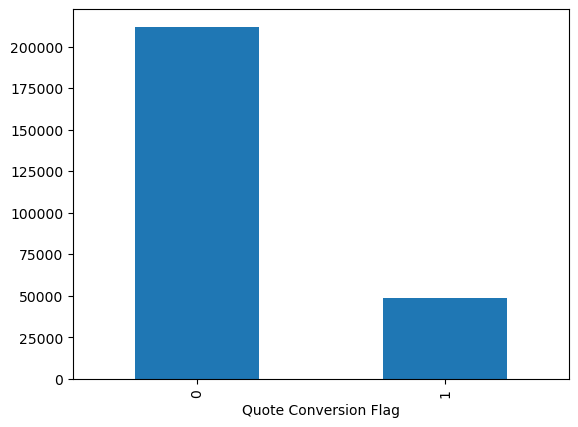

In [5]:
d_tr['QuoteConversion_Flag'].value_counts().plot(kind='bar', xlabel = 'Quote Conversion Flag')

### Observation 

- It is imbalanced dataset

In [6]:
print(d_tr['QuoteConversion_Flag'].value_counts() / d_tr['QuoteConversion_Flag'].count() * 100)

0    81.248921
1    18.751079
Name: QuoteConversion_Flag, dtype: float64


- Unsuccessful Conversion of Quote (QuoteConversion_Flag = 0): 81.248921% 
- Successful Conversion of Quote (QuoteConversion_Flag = 1): 18.751079% 

## 4.2 Extracting Date, Month, Year 

In [4]:
d_tr['Date'] = pd.DatetimeIndex(d_tr['Original_Quote_Date']).day
d_tr['Month'] = pd.DatetimeIndex(d_tr['Original_Quote_Date']).month
d_tr['Year'] = pd.DatetimeIndex(d_tr['Original_Quote_Date']).year
d_tr['Day_of_Week'] = pd.DatetimeIndex(d_tr['Original_Quote_Date']).weekday
d_tr['Quarter'] = pd.DatetimeIndex(d_tr['Original_Quote_Date']).quarter

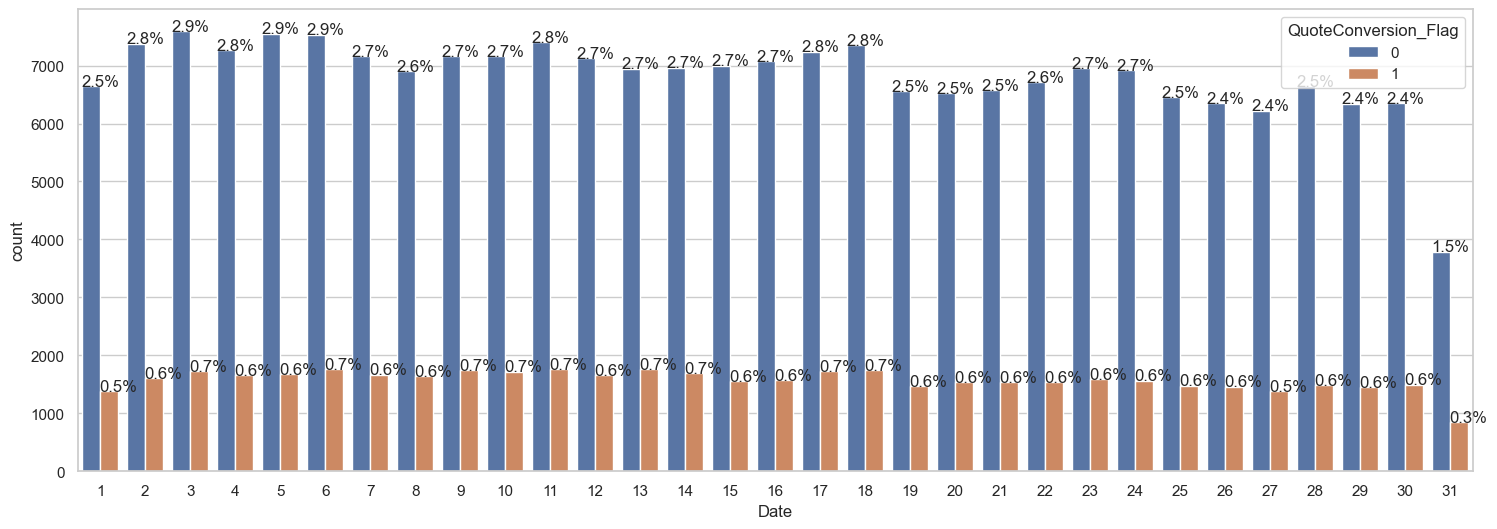

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(18,6))
total = float(len(d_tr))
ax = sns.countplot(x=d_tr['Date'], hue=d_tr['QuoteConversion_Flag'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

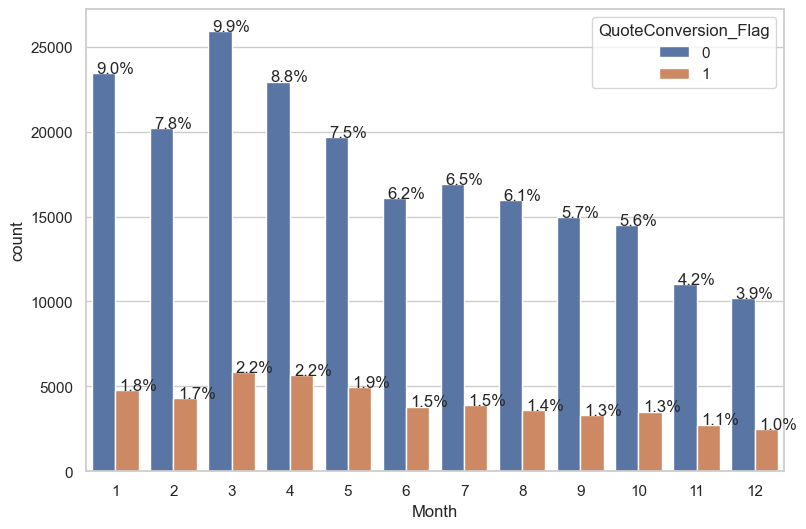

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(9,6))
total = float(len(d_tr))
ax = sns.countplot(x=d_tr['Month'], hue=d_tr['QuoteConversion_Flag'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

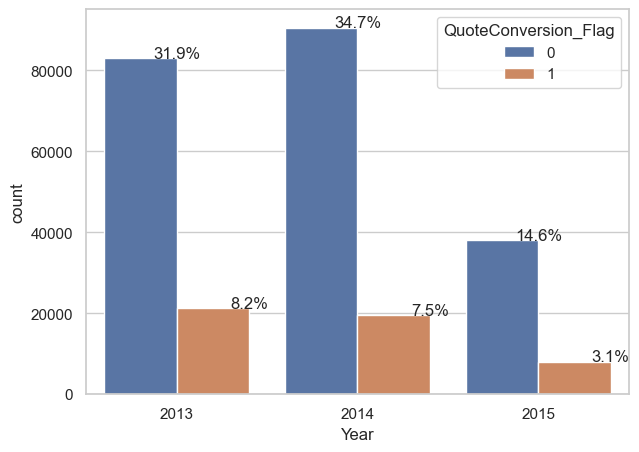

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))
total = float(len(d_tr))
ax = sns.countplot(x=d_tr['Year'], hue=d_tr['QuoteConversion_Flag'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

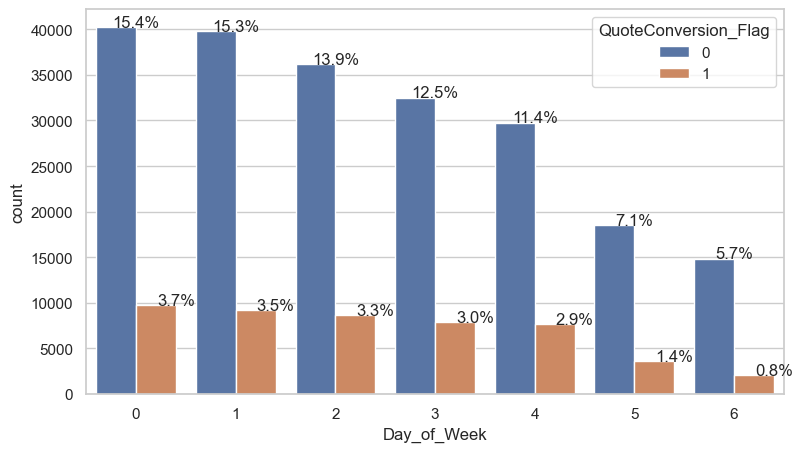

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(9,5))
total = float(len(d_tr))
ax = sns.countplot(x=d_tr['Day_of_Week'], hue=d_tr['QuoteConversion_Flag'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

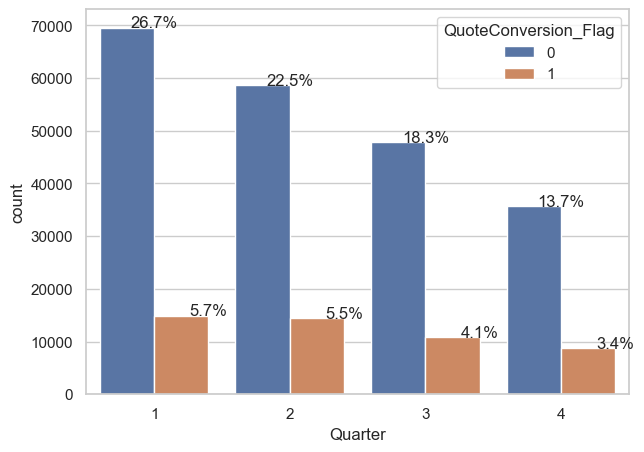

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))
total = float(len(d_tr))
ax = sns.countplot(x=d_tr['Quarter'], hue=d_tr['QuoteConversion_Flag'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

### Observations:

- Datewise plot and Yearwise plot does not provide any information.
- If we see the month plot, January, March and April has more number of count of quotes and conversion rate is also better.
- Week days have higher conversion rate while weekends have very less conversion rate.

In [5]:
# Test Data
d_te['Date'] = pd.DatetimeIndex(d_te['Original_Quote_Date']).day
d_te['Month'] = pd.DatetimeIndex(d_te['Original_Quote_Date']).month
d_te['Year'] = pd.DatetimeIndex(d_te['Original_Quote_Date']).year
d_te['Day_of_Week'] = pd.DatetimeIndex(d_te['Original_Quote_Date']).weekday
d_te['Quarter'] = pd.DatetimeIndex(d_te['Original_Quote_Date']).quarter

---

In [6]:
def extract_features(dataset, feature_name):
    """
    This function takes all the features as the input and returns the subset of features as per our requirement. 
    """
    features = [x for x in dataset.columns if x.startswith(feature_name)]
    return pd.DataFrame(dataset, columns=features)

In [7]:
def categorical_features(sub_features):
    """
    This function take features as the input and returns those features which contains categorical data
    """
    cat_features = sub_features.select_dtypes(exclude = ('float64', 'int64', 'number'))
    return cat_features

In [8]:
def numerical_features(sub_features):
    """
    This function take features as the input and returns those features which contains numeric data
    """
    cat_features = sub_features.select_dtypes(include = 'number')
    return cat_features

---

## 4.3 EDA on 'Field' Features

Field10 is a numeric feature but due to the presence of comma(,), it considered as categorical features hence we need to convert it to numeric feature.

In [9]:
# Train data
d_tr['Field10'] = d_tr['Field10'].str.replace(',', '')
d_tr['Field10'] = d_tr['Field10'].astype(int)

# Test data
d_te['Field10'] = d_te['Field10'].str.replace(',', '')
d_te['Field10'] = d_te['Field10'].astype(int)

In [18]:
field = extract_features(d_tr, 'Field')

print('Numeric Features: ', list(numerical_features(field)))
print('Categorical Features: ', list(categorical_features(field)))

Numeric Features:  ['Field7', 'Field8', 'Field9', 'Field10', 'Field11']
Categorical Features:  ['Field6', 'Field12']


### Categorical Features

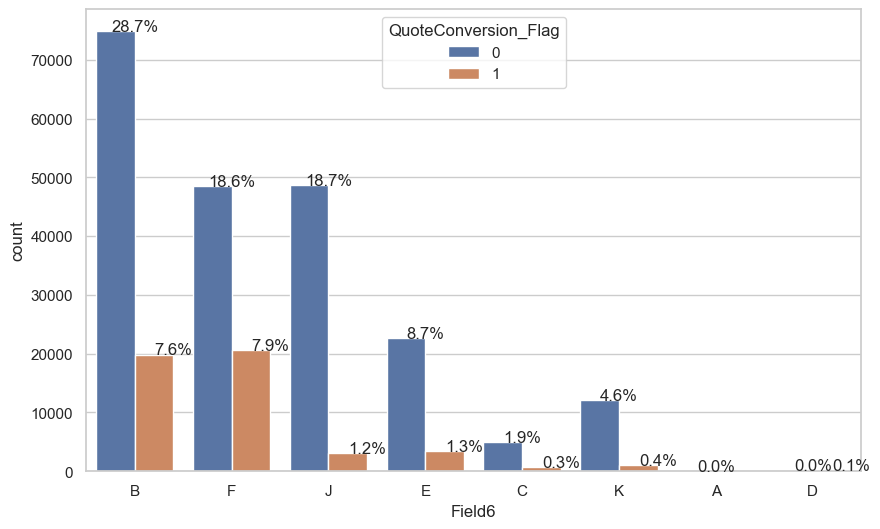

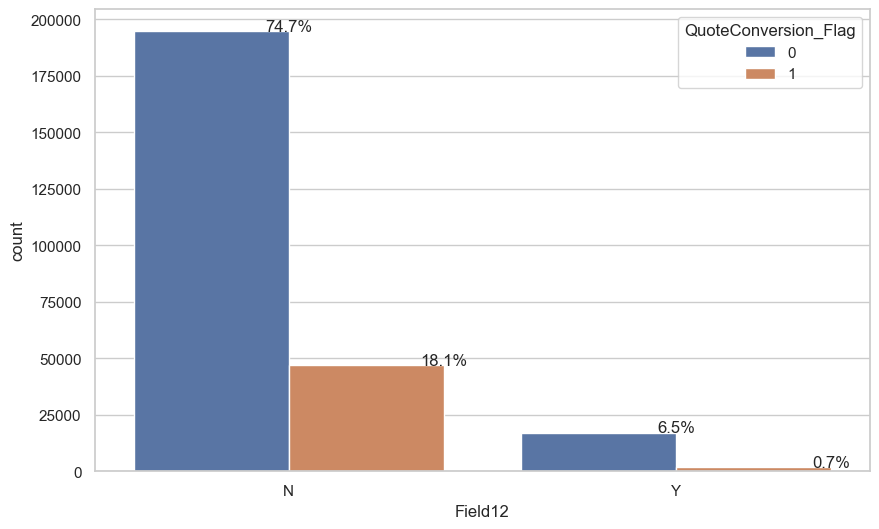

In [19]:
# Ref: https://www.codegrepper.com/code-examples/python/how+to+add+percentage+in+countplot

for feature in categorical_features(field):    
    sns.set(style="whitegrid")
    plt.figure(figsize=(10,6))
    total = float(len(d_tr))
    ax = sns.countplot(x=d_tr[feature], hue=d_tr['QuoteConversion_Flag'])

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.show()

##### Observation:
1. **Field6** : B and F values have a high conversion rate.
2. **Field12** : Drastically reduces the conversion rate when value is Y.

### Numerical Features

##### Observation:
1. The distribution of numeric features seems like it does not follow any standard distribution
2. This numerical features does not provide any information.

---

## 4.4 EDA on CoverageField Features

In [21]:
coverage = extract_features(d_tr, 'CoverageField')

print('Numeric Features: ', list(numerical_features(coverage)))
print('Categorical Features: ', list(categorical_features(coverage)))

Numeric Features:  ['CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B', 'CoverageField5A', 'CoverageField5B', 'CoverageField6A', 'CoverageField6B', 'CoverageField11A', 'CoverageField11B']
Categorical Features:  ['CoverageField8', 'CoverageField9']


### Categorical Features

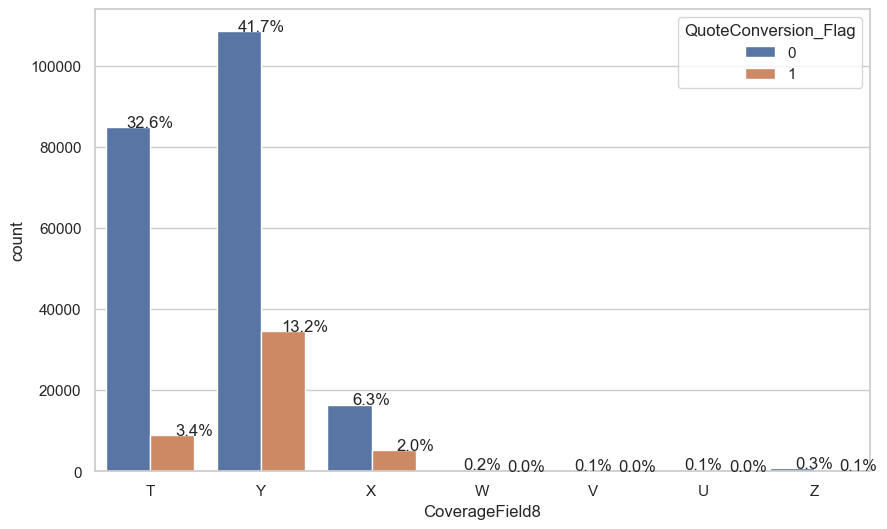

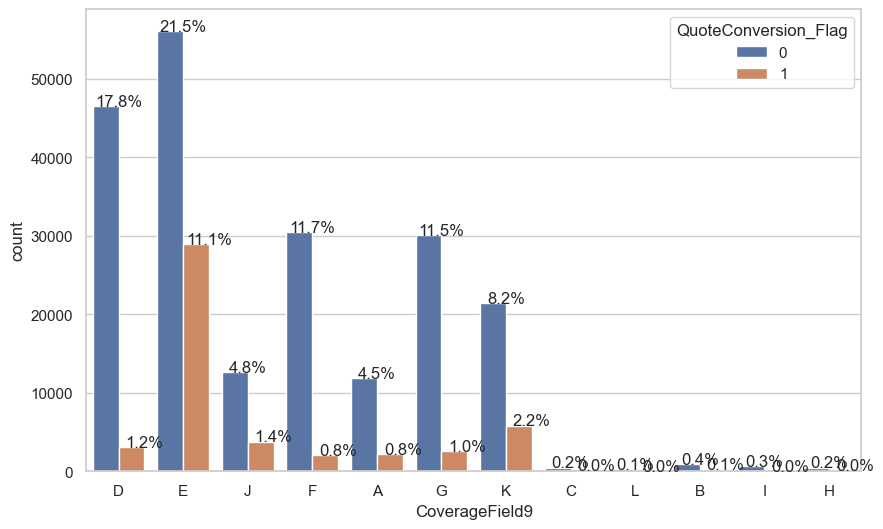

In [22]:
for feature in categorical_features(coverage):    
    sns.set(style="whitegrid")
    plt.figure(figsize=(10,6))
    total = float(len(d_tr))
    ax = sns.countplot(x=d_tr[feature], hue=d_tr['QuoteConversion_Flag'])

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.show()

##### Observations:
1. **CoverageField8** : More chances of successful conversion of quotes if the values are **T**, **Y**, **X**.
2. **CoverageField9** : Value **E** has a highest chances of successful conversion.

### Numerical Features

### Observations
1. The distribution of CoverageField 1A,2A,3A,4A and 11A looks like right skewed distribution.

---

## 4.5 EDA on 'SalesField' Features

In [24]:
sales = extract_features(d_tr, 'SalesField')

print('Numeric Features: ', list(numerical_features(sales)))
print('Categorical Features: ', list(categorical_features(sales)))

Numeric Features:  ['SalesField1A', 'SalesField1B', 'SalesField2A', 'SalesField2B', 'SalesField3', 'SalesField4', 'SalesField5', 'SalesField6', 'SalesField8', 'SalesField9', 'SalesField10', 'SalesField11', 'SalesField12', 'SalesField13', 'SalesField14', 'SalesField15']
Categorical Features:  ['SalesField7']


### Categorical Features

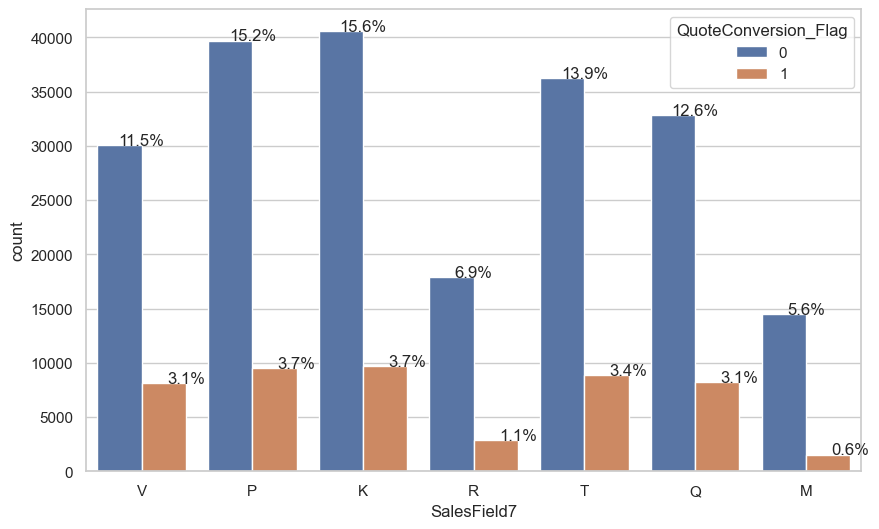

In [25]:
for feature in categorical_features(sales):    
    sns.set(style="whitegrid")
    plt.figure(figsize=(10,6))
    total = float(len(d_tr))
    ax = sns.countplot(x=d_tr[feature], hue=d_tr['QuoteConversion_Flag'])

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.show()

### Numerical Features

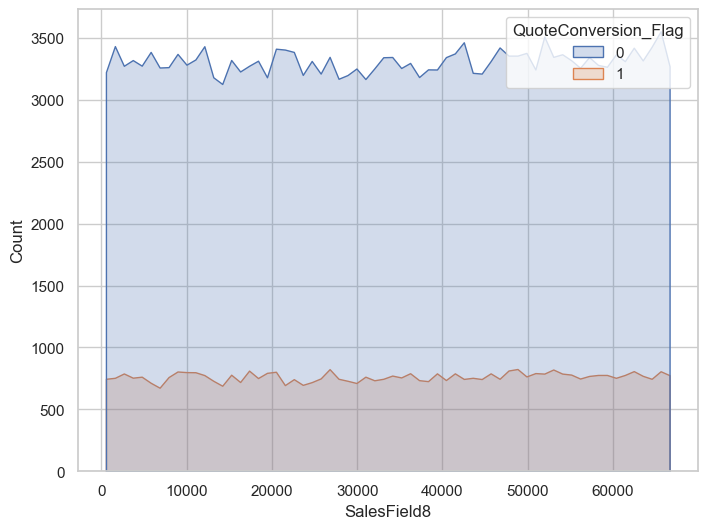

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))

sns.histplot(data = d_tr, x = d_tr['SalesField8'],  hue=d_tr['QuoteConversion_Flag'], element = 'poly')
plt.show()

### Observations:

1. The Distribution of SalesField 1A,2A,10,11,12,13,14,15 looks like right skewed distribution.
2. SalesField 1A and 1B have inverse relationship between the count of unsuccessful quote conversion and successful quote conversion.
3. Chances of quote conversion increases if the value is 1 in SalesField3.
4. In SalesField8, count of successful convergence of quote is distributed approximately uniformly.

---

## 4.6 EDA on 'PersonalField' Features

In [28]:
personal = extract_features(d_tr, 'PersonalField')

print('Numeric Features: ', list(numerical_features(personal)))
print('Categorical Features: ', list(categorical_features(personal)))

Numeric Features:  ['PersonalField1', 'PersonalField2', 'PersonalField4A', 'PersonalField4B', 'PersonalField5', 'PersonalField6', 'PersonalField8', 'PersonalField9', 'PersonalField10A', 'PersonalField10B', 'PersonalField11', 'PersonalField12', 'PersonalField13', 'PersonalField14', 'PersonalField15', 'PersonalField22', 'PersonalField23', 'PersonalField24', 'PersonalField25', 'PersonalField26', 'PersonalField27', 'PersonalField28', 'PersonalField29', 'PersonalField30', 'PersonalField31', 'PersonalField32', 'PersonalField33', 'PersonalField34', 'PersonalField35', 'PersonalField36', 'PersonalField37', 'PersonalField38', 'PersonalField39', 'PersonalField40', 'PersonalField41', 'PersonalField42', 'PersonalField43', 'PersonalField44', 'PersonalField45', 'PersonalField46', 'PersonalField47', 'PersonalField48', 'PersonalField49', 'PersonalField50', 'PersonalField51', 'PersonalField52', 'PersonalField53', 'PersonalField54', 'PersonalField55', 'PersonalField56', 'PersonalField57', 'PersonalField5

### Categorical Features

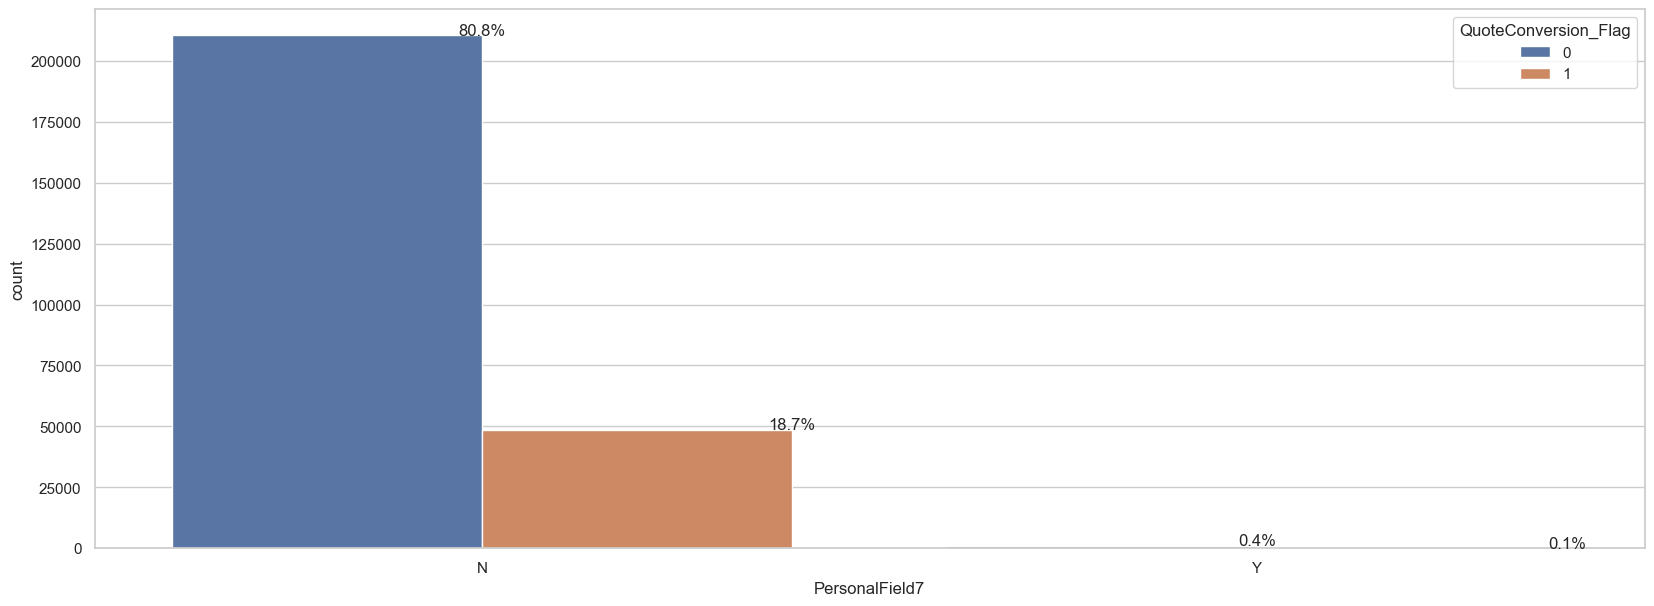

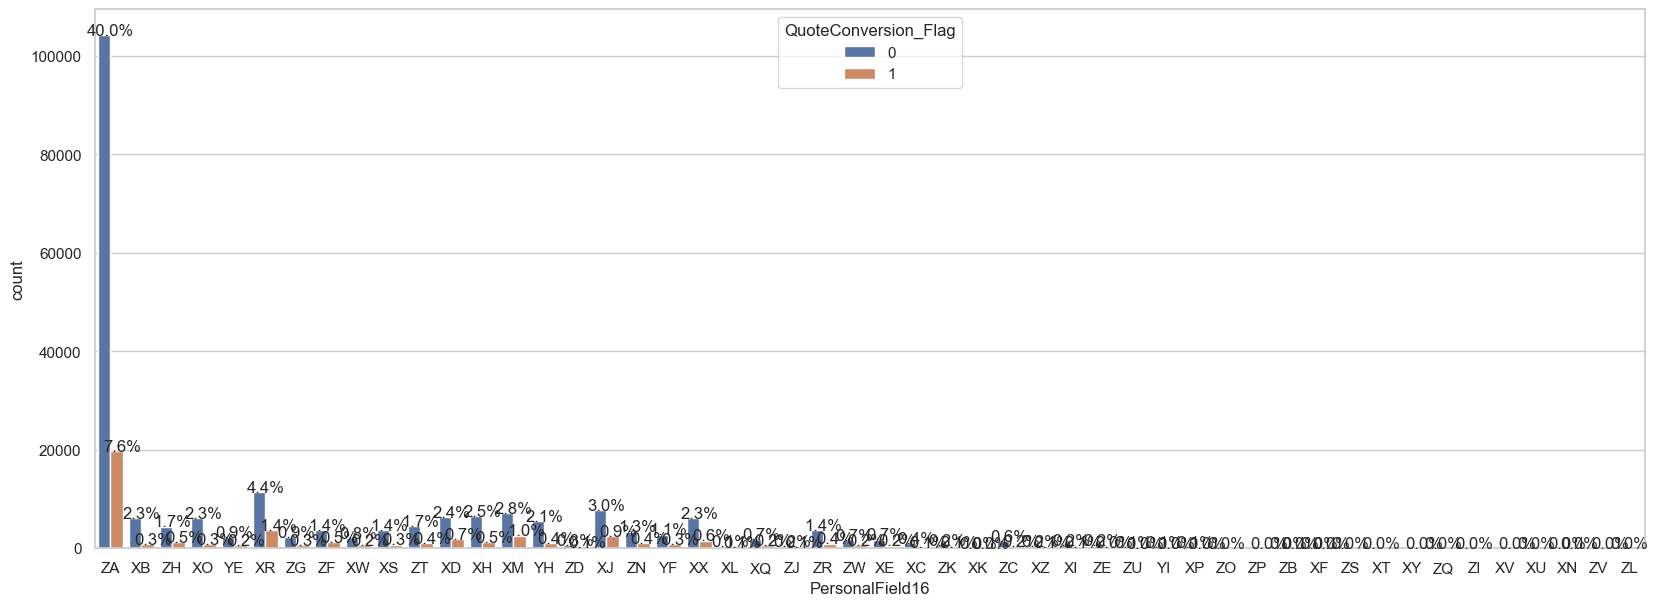

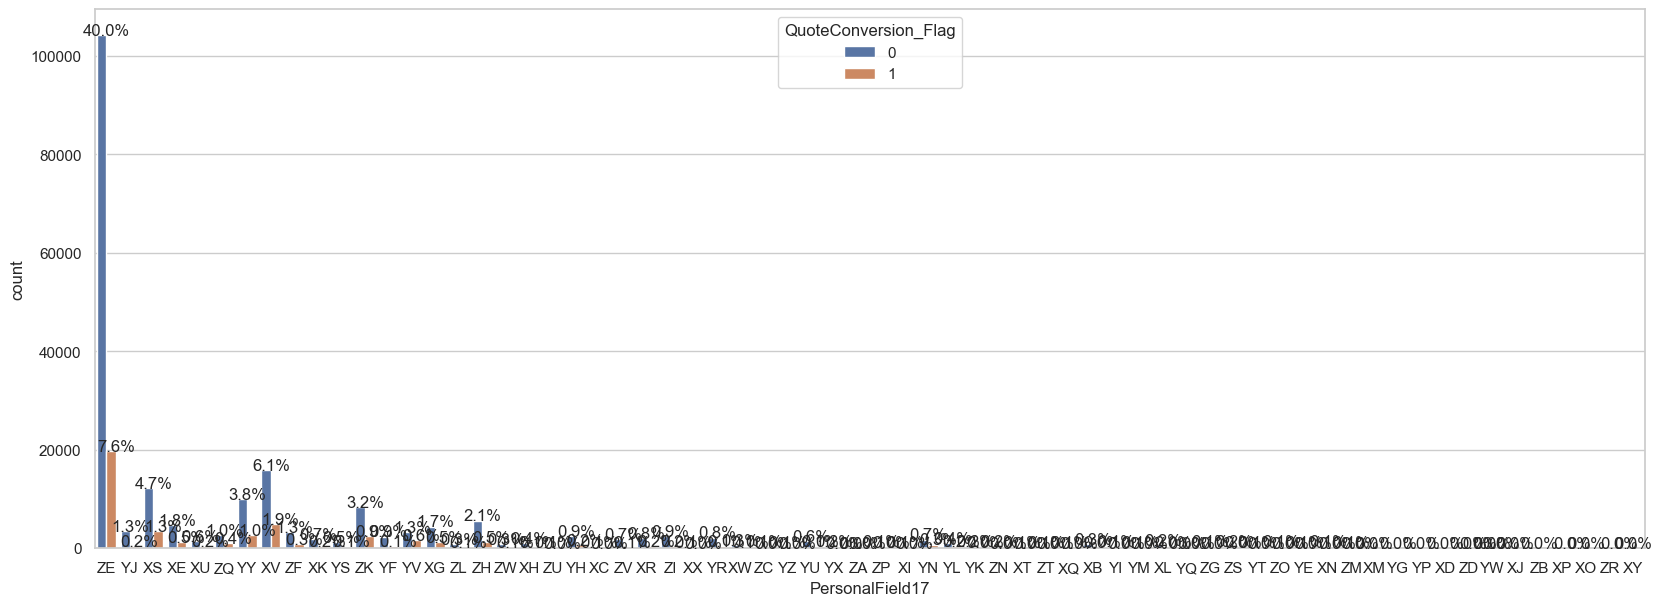

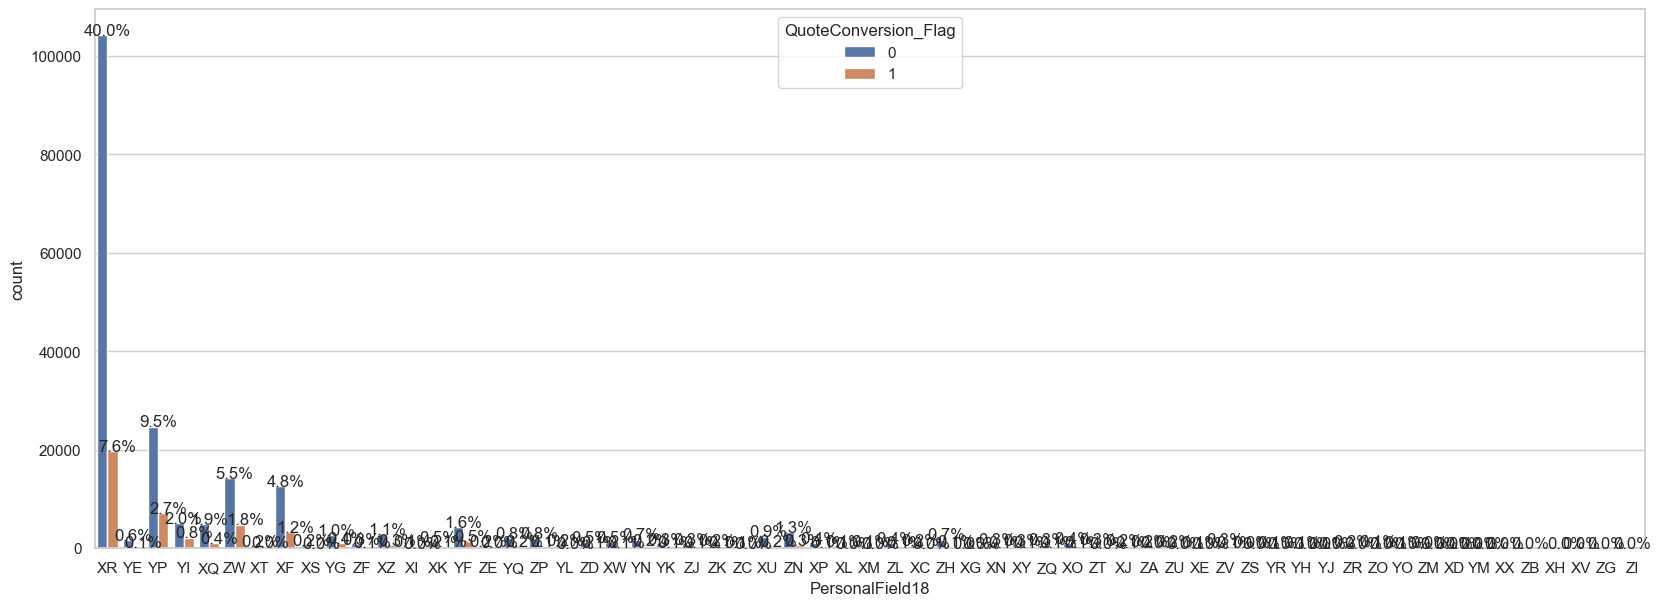

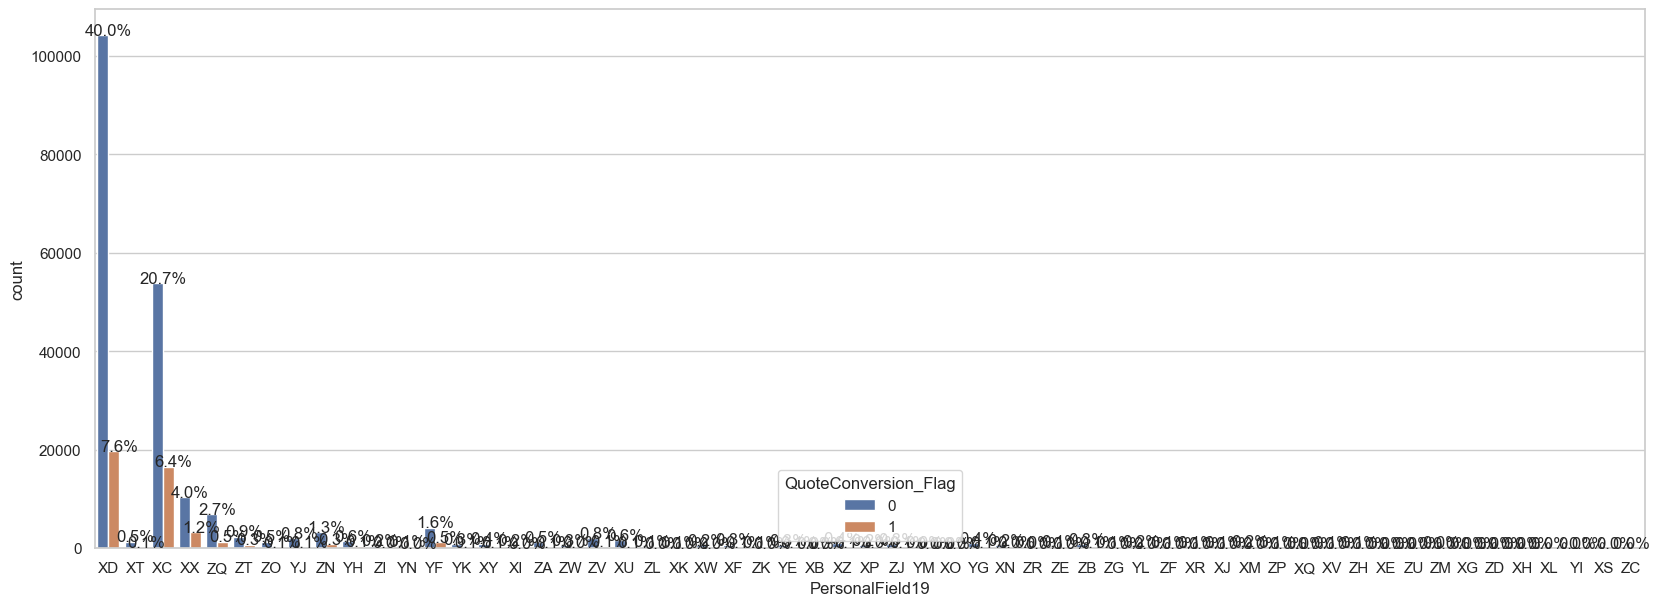

In [29]:
for feature in categorical_features(personal):    
    sns.set(style="whitegrid")
    plt.figure(figsize=(20,7))
    total = float(len(d_tr))
    ax = sns.countplot(x=d_tr[feature], hue=d_tr['QuoteConversion_Flag'])

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.show()

### Observations
1. **PersonalField16, 17, 18, 19** has a right skewed distribution

---

## 4.7 EDA on 'PropertyField' Features

In [31]:
property_ = extract_features(d_tr, 'PropertyField')

print('Numeric Features: ', list(numerical_features(property_)))
print('Categorical Features: ', list(categorical_features(property_)))

Numeric Features:  ['PropertyField1A', 'PropertyField1B', 'PropertyField2A', 'PropertyField2B', 'PropertyField6', 'PropertyField8', 'PropertyField9', 'PropertyField10', 'PropertyField11A', 'PropertyField11B', 'PropertyField12', 'PropertyField13', 'PropertyField15', 'PropertyField16A', 'PropertyField16B', 'PropertyField17', 'PropertyField18', 'PropertyField19', 'PropertyField20', 'PropertyField21A', 'PropertyField21B', 'PropertyField22', 'PropertyField23', 'PropertyField24A', 'PropertyField24B', 'PropertyField25', 'PropertyField26A', 'PropertyField26B', 'PropertyField27', 'PropertyField29', 'PropertyField35', 'PropertyField39A', 'PropertyField39B']
Categorical Features:  ['PropertyField3', 'PropertyField4', 'PropertyField5', 'PropertyField7', 'PropertyField14', 'PropertyField28', 'PropertyField30', 'PropertyField31', 'PropertyField32', 'PropertyField33', 'PropertyField34', 'PropertyField36', 'PropertyField37', 'PropertyField38']


### Observation
1. PropertyField6 contains a single value, so we remove this feature.

---

## 4.8 EDA on 'GeographicField' Features

In [34]:
geo = extract_features(d_tr, 'GeographicField')

print('Numeric Features: ', list(numerical_features(geo)))
print('Categorical Features: ', list(categorical_features(geo)))

Numeric Features:  ['GeographicField1A', 'GeographicField1B', 'GeographicField2A', 'GeographicField2B', 'GeographicField3A', 'GeographicField3B', 'GeographicField4A', 'GeographicField4B', 'GeographicField5A', 'GeographicField5B', 'GeographicField6A', 'GeographicField6B', 'GeographicField7A', 'GeographicField7B', 'GeographicField8A', 'GeographicField8B', 'GeographicField9A', 'GeographicField9B', 'GeographicField10A', 'GeographicField10B', 'GeographicField11A', 'GeographicField11B', 'GeographicField12A', 'GeographicField12B', 'GeographicField13A', 'GeographicField13B', 'GeographicField14A', 'GeographicField14B', 'GeographicField15A', 'GeographicField15B', 'GeographicField16A', 'GeographicField16B', 'GeographicField17A', 'GeographicField17B', 'GeographicField18A', 'GeographicField18B', 'GeographicField19A', 'GeographicField19B', 'GeographicField20A', 'GeographicField20B', 'GeographicField21A', 'GeographicField21B', 'GeographicField22A', 'GeographicField22B', 'GeographicField23A', 'Geograp

### Categorical Features

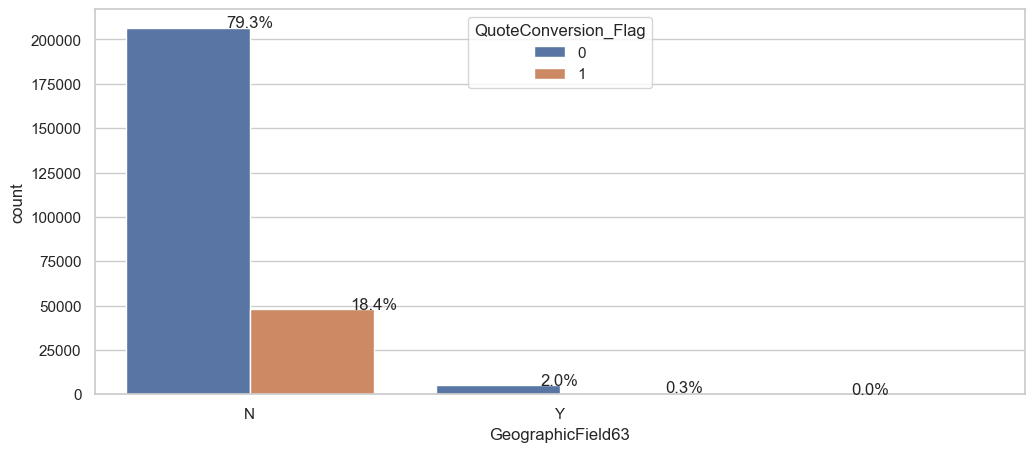

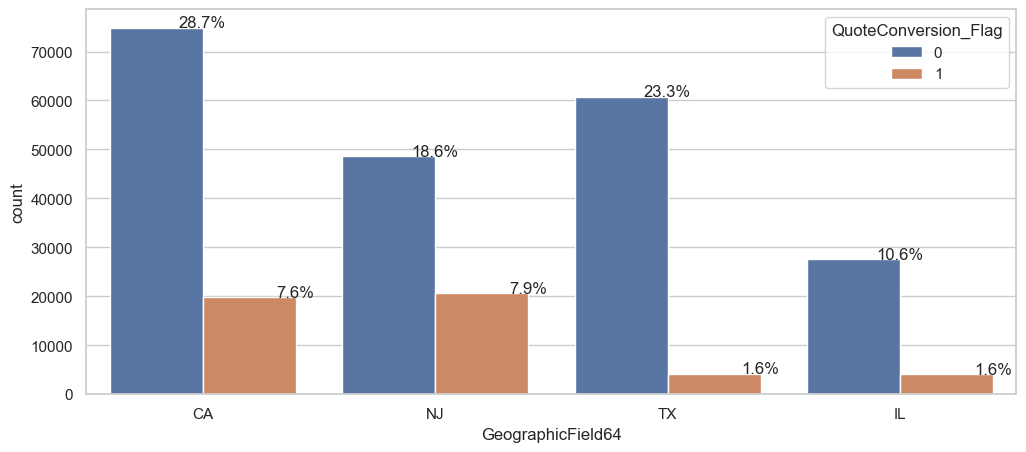

In [35]:
for feature in categorical_features(geo):    
    sns.set(style="whitegrid")
    plt.figure(figsize=(12,5))
    total = float(len(d_tr))
    ax = sns.countplot(x=d_tr[feature], hue=d_tr['QuoteConversion_Flag'])

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.show()

### Observations
1. **GeographicField64**: **NJ** has the highest rate of Quote Conversion and then **CA**

---

### Numerical Features

### Observations
1. Geographic Field10A contains a single value. So, we removed this feature.

---

## 4.9 Checking for Missing Values

In [37]:
def Missing_values(data):
    """ This function takes all the features as the input and returns those features which contains the missing values """
    MissingValue_Features = []
    for feature in data.columns:
        if data[feature].isna().sum() >= 1:
            MissingValue_Features.append(feature)
    return MissingValue_Features

In [38]:
# Train data
for feature in Missing_values(d_tr):
    print(feature, "has", (d_tr[feature].isna().sum()), "Missing Values")

PersonalField7 has 113 Missing Values
PersonalField84 has 124208 Missing Values
PropertyField3 has 81 Missing Values
PropertyField4 has 63 Missing Values
PropertyField29 has 200685 Missing Values
PropertyField32 has 70 Missing Values
PropertyField34 has 70 Missing Values
PropertyField36 has 113 Missing Values
PropertyField38 has 1220 Missing Values


In [39]:
# Test data
for feature in Missing_values(d_te):
    print(feature, "has", (d_te[feature].isna().sum()), "Missing Values")

PersonalField7 has 69 Missing Values
PersonalField84 has 82812 Missing Values
PropertyField3 has 69 Missing Values
PropertyField4 has 52 Missing Values
PropertyField5 has 1 Missing Values
PropertyField29 has 133945 Missing Values
PropertyField30 has 1 Missing Values
PropertyField32 has 41 Missing Values
PropertyField34 has 41 Missing Values
PropertyField36 has 67 Missing Values
PropertyField38 has 846 Missing Values


 ---

# 5. Feature Engineering

## 5.1 Handling imbalance data

In [10]:
# Seperating Majority and Minority classes
d_tr_majority = d_tr[d_tr['QuoteConversion_Flag'] == 0]
d_tr_minority = d_tr[d_tr['QuoteConversion_Flag'] == 1]

In [11]:
# Upsampling the minority class
from sklearn.utils import resample
upsampled = resample(d_tr_minority, replace=True, n_samples = 2*len(d_tr_minority), random_state=42)

In [12]:
# Downsampling the majority class
downsample = resample(d_tr_majority, replace=True, n_samples=len(upsampled), random_state=42)

In [13]:
data = pd.concat([downsample, upsampled])
data['QuoteConversion_Flag'].value_counts()

0    97788
1    97788
Name: QuoteConversion_Flag, dtype: int64

##  5.2 Add a new feature in a dataset which represents count of null values in each row.

In [14]:
# Train data
data['Null_Count'] = data.isna().sum(axis = 1)

# Test data
d_te['Null_Count'] = d_te.isna().sum(axis = 1)

## 5.3 Handling Missing Values 

### 5.3.1 Categorical Features

- As per the Competition Host in https://www.kaggle.com/competitions/homesite-quote-conversion/discussion/17382#99973, missing data is represented by -1, hence we replace all categorical data with -1.

In [15]:
# Train data
data['PersonalField7'] = data['PersonalField7'].fillna(-1).astype(str)
data['PropertyField3'] = data['PropertyField3'].fillna(-1).astype(str)
data['PropertyField4'] = data['PropertyField4'].fillna(-1).astype(str)
data['PropertyField32'] = data['PropertyField32'].fillna(-1).astype(str)
data['PropertyField34'] = data['PropertyField34'].fillna(-1).astype(str)
data['PropertyField36'] = data['PropertyField36'].fillna(-1).astype(str)
data['PropertyField38'] = data['PropertyField38'].fillna(-1).astype(str)

In [16]:
# Test data
d_te['PersonalField7'] = d_te['PersonalField7'].fillna(-1).astype(str)
d_te['PropertyField3'] = d_te['PropertyField3'].fillna(-1).astype(str)
d_te['PropertyField4'] = d_te['PropertyField4'].fillna(-1).astype(str)
d_te['PropertyField32'] = d_te['PropertyField32'].fillna(-1).astype(str)
d_te['PropertyField34'] = d_te['PropertyField34'].fillna(-1).astype(str)
d_te['PropertyField36'] = d_te['PropertyField36'].fillna(-1).astype(str)
d_te['PropertyField38'] = d_te['PropertyField38'].fillna(-1).astype(str)
d_te['PropertyField5'] = d_te['PropertyField5'].fillna(-1).astype(str)
d_te['PropertyField30'] = d_te['PropertyField30'].fillna(-1).astype(str)

### 5.3.2 Numerical Features

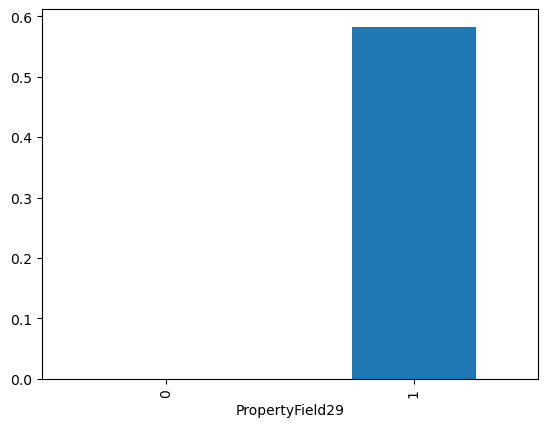

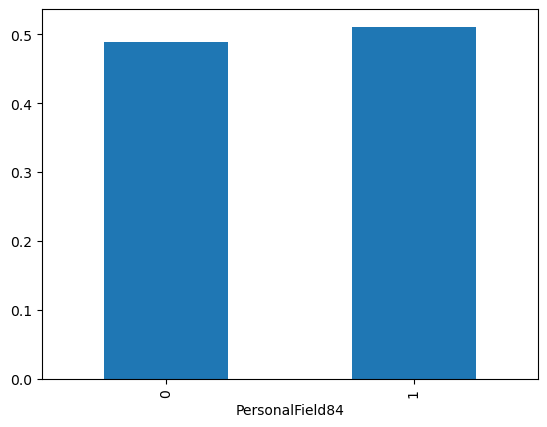

In [17]:
for feature in ['PropertyField29', 'PersonalField84']:
    df_1 = data.copy()
    df_1[feature] = np.where(df_1[feature].isnull(),1,0)
    df_1.groupby(feature)['QuoteConversion_Flag'].mean().plot.bar()

    plt.show()

### Observations

- **PropertyField29**: If this value is Not Null then chances of successful conversion of quote is extremely low. So, the presence of missing/null value provides us an important information.
<br>
- **PersonalField84**: Presence of missing/null value does not provide any meaningful information

In [18]:
# Train data
data['PropertyField29_nan'] = np.where(data['PropertyField29'].isnull(),1,0)
data['PersonalField84_nan'] = np.where(data['PersonalField84'].isnull(),1,0)

# Test data
d_te['PropertyField29_nan'] = np.where(d_te['PropertyField29'].isnull(),1,0)
d_te['PersonalField84_nan'] = np.where(d_te['PersonalField84'].isnull(),1,0)

In [19]:
# Train data
data['PropertyField29'] = data['PropertyField29'].fillna(-1).astype(float)
data['PersonalField84'] = data['PersonalField84'].fillna(-1).astype(float)

# Test data
d_te['PropertyField29'] = d_te['PropertyField29'].fillna(-1).astype(float)
d_te['PersonalField84'] = d_te['PersonalField84'].fillna(-1).astype(float)

## 5.4 Add a new feature in a dataset which represents count of -1 value in each row.

In [20]:
# Train data
data['Count_-1'] = (data == -1).sum(axis=1)

# Test data
d_te['Count_-1'] = (d_te == -1).sum(axis=1)

## 5.5 Adding two new features as positive and negative

- The binary value features has 2 unique values
- Some features with three unique values are also considered as binary value features because it had only 2 unique values and some values are NaN
- In case of (0,1), (N,Y), from EDA, we know that, first element will mostly corresponding to False and second element mostly corresponding to True.
- We add a new features as a Negative and Positive.

In [21]:
Binary_Features = ['Field12', 'SalesField3', 'SalesField9', 'PersonalField1', 'PersonalField2', 'PersonalField6',
                   'PersonalField7', 'PropertyField3', 'PropertyField4', 'PropertyField5', 'PropertyField8',
                   'PropertyField29', 'PropertyField30', 'PropertyField32', 'PropertyField34', 'PropertyField36', 
                   'PropertyField37', 'PropertyField38']

temp_tr = pd.DataFrame(data, columns= Binary_Features)
temp_te = pd.DataFrame(d_te, columns= Binary_Features)

In [22]:
# Train data
data['Negative'] = (temp_tr == 0).sum(axis=1) + (temp_tr == 'N').sum(axis=1)
data['Positive'] = (temp_tr == 1).sum(axis=1) + (temp_tr == 'Y').sum(axis=1)

# Test data
d_te['Negative'] = (temp_te == 0).sum(axis=1) + (temp_te == 'N').sum(axis=1)
d_te['Positive'] = (temp_te == 1).sum(axis=1) + (temp_te == 'Y').sum(axis=1)

## 5.6 Adding new feature as a WeekDay 

In [23]:
# Train data
data['WEEKDAY'] = (np.where(pd.DatetimeIndex(data['Original_Quote_Date']).weekday > 4, 0,1))

# Test data
d_te['WEEKDAY'] = (np.where(pd.DatetimeIndex(d_te['Original_Quote_Date']).weekday > 4, 0,1))

## 5.7 Removing features which contains a single value 

In [24]:
# Train data
data.drop(['PropertyField6', 'GeographicField10A'], axis = 1, inplace= True)

# Test data
d_te.drop(['PropertyField6', 'GeographicField10A'], axis = 1, inplace= True)

## 5.8 Correlation with the Target Variable

In [55]:
corr_matrix = data.corr()
print(corr_matrix['QuoteConversion_Flag'].sort_values(ascending=False))

QuoteConversion_Flag    1.000000
PropertyField29_nan     0.406084
PropertyField35         0.269595
CoverageField11B        0.231612
Field9                  0.218983
Positive                0.218881
Null_Count              0.211902
GeographicField20A      0.199704
CoverageField11A        0.179313
GeographicField17B      0.170433
GeographicField20B      0.166060
Field8                  0.165558
GeographicField44A      0.153959
GeographicField44B      0.152493
SalesField6             0.149147
SalesField3             0.148251
GeographicField38B      0.147842
PropertyField8          0.145247
PropertyField1B         0.142098
PropertyField1A         0.133086
GeographicField2A       0.130800
PropertyField15         0.130525
GeographicField2B       0.128537
GeographicField36B      0.124941
GeographicField38A      0.123913
PersonalField82         0.120942
PersonalField1          0.119116
GeographicField41B      0.117655
PersonalField26         0.114606
GeographicField36A      0.113521
PersonalFi

### Observation
- We can see that PropertyField29_nan, PropertyField35 and CoverageField11B have high correlation values w.r.t the target variable.

---

# 6. Pre-Modelling

## 6.1 Train-Test Split

In [25]:
# Train data
y = data['QuoteConversion_Flag'].values
X = data.drop(['QuoteConversion_Flag', 'QuoteNumber', 'Original_Quote_Date', 'SalesField8'], axis=1)

# Test Data
te_quote_num = d_te['QuoteNumber'].values
d_te = d_te.drop(['QuoteNumber', 'Original_Quote_Date', 'SalesField8'], axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((156460, 305), (156460,), (39116, 305), (39116,))

---

## 6.2 Encoding Categorical Variables

In [27]:
# For Train data
label_encoder = preprocessing.LabelEncoder()

# Iterate over column names
for column in X_train.columns:
    if X_train[column].dtype.kind == 'O':
        X_train[column]= label_encoder.fit_transform(X_train[column])       

In [28]:
# For Test data
label_encoder = preprocessing.LabelEncoder()

# Iterate over column names
for column in X_test.columns:
    if X_test[column].dtype.kind == 'O':
        X_test[column]= label_encoder.fit_transform(X_test[column])

In [29]:
# For Actual Test data
label_encoder = preprocessing.LabelEncoder()

# Iterate over column names
for column in d_te.columns:
    if d_te[column].dtype.kind == 'O':
        d_te[column]= label_encoder.fit_transform(d_te[column])

---

## 6.3 PCA for Dimensionality Reduction

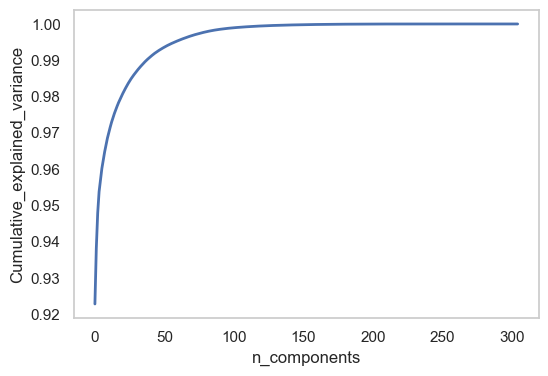

In [61]:
from sklearn import decomposition
pca = decomposition.PCA()

pca.n_components = 305
pca_data = pca.fit_transform(X_train)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

---

## 6.4 Data Visualization using T-SNE

In [62]:
data_7500 = X_train[:7500]
labels = y_train[:7500]

scaler = StandardScaler()
data_7500 = scaler.fit_transform(data_7500)

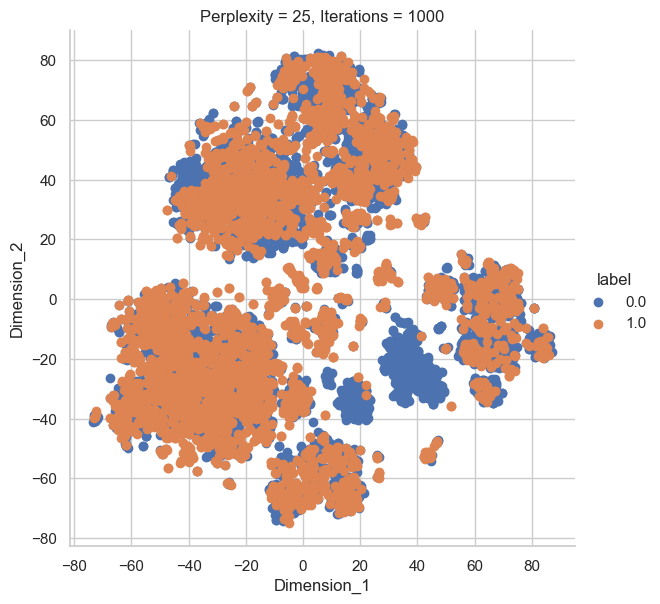

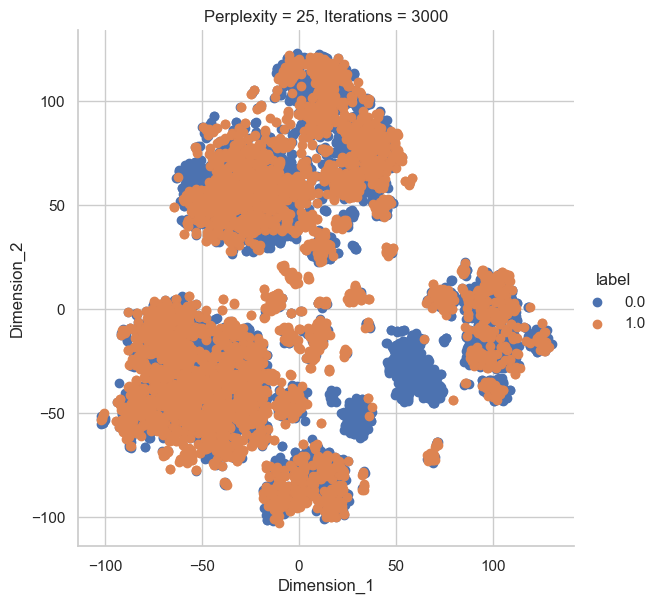

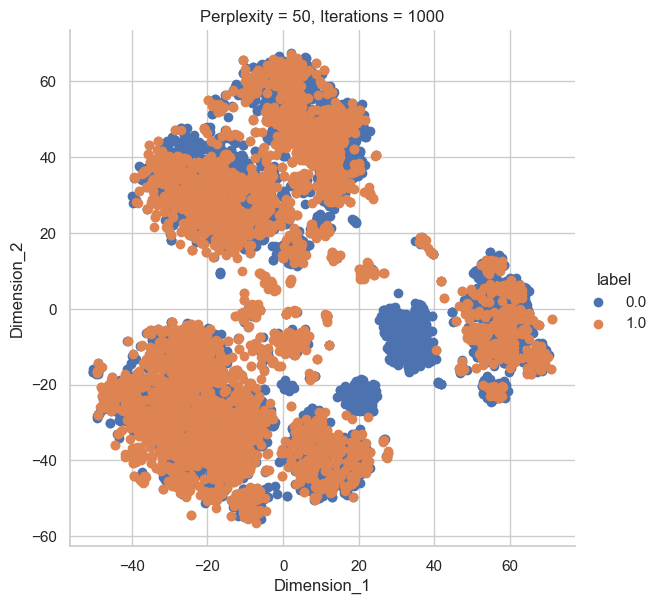

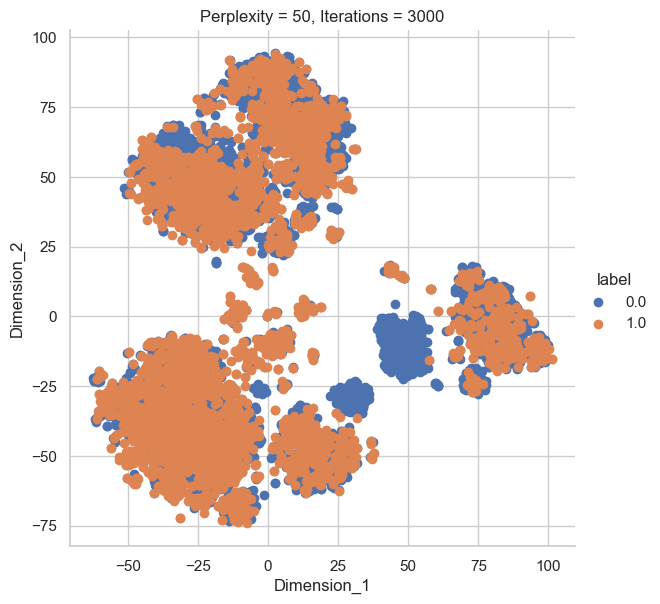

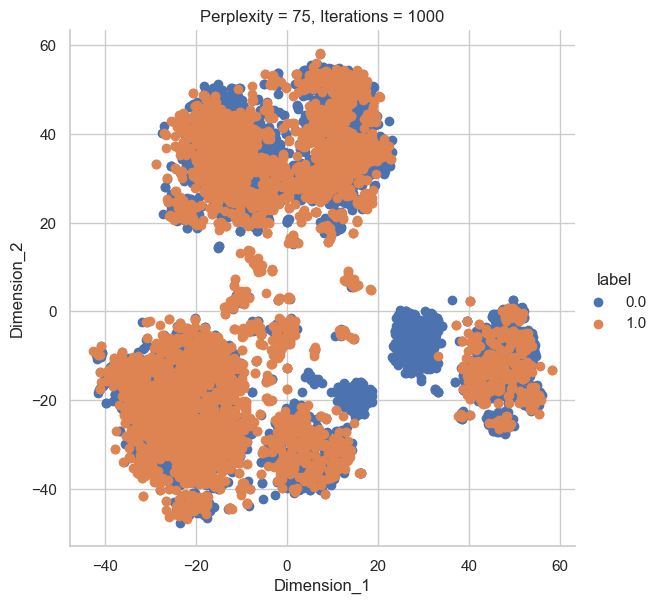

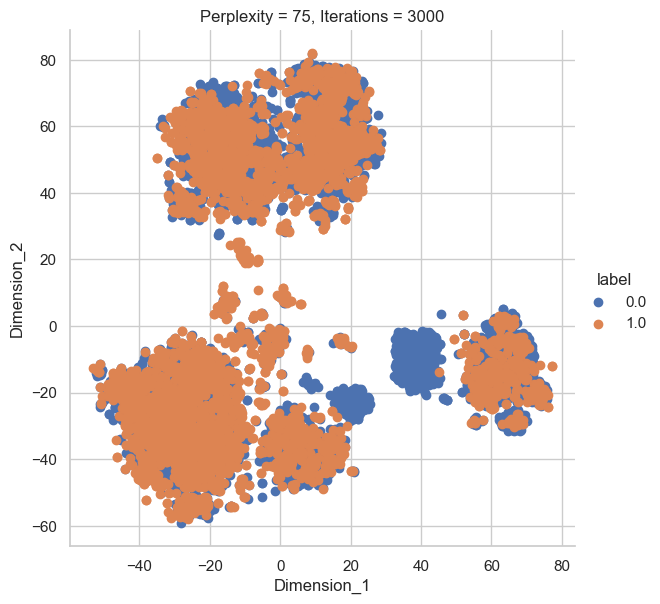

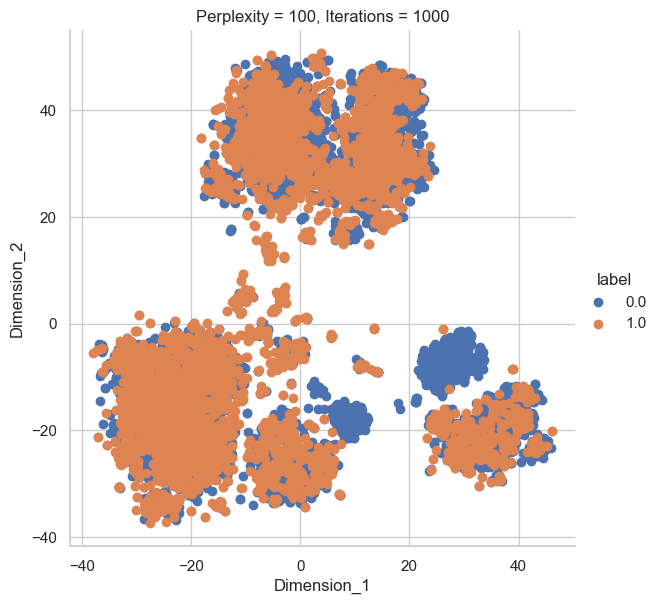

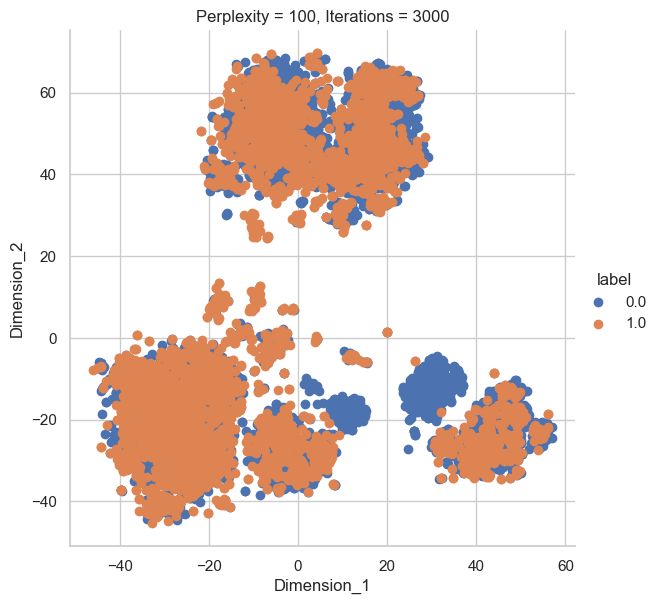

In [63]:
for i in [25,50,75,100]: # for perplexity
    for j in [1000,3000]: # for number of iterations
        model = TSNE(n_components=2, random_state=0, perplexity=i, n_iter=j)
        tsne_data = model.fit_transform(data_7500) 

        # creating a new data fram which help us in ploting the result data
        tsne_data = np.vstack((tsne_data.T, labels)).T
        tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension_1", "Dimension_2", "label"))

        # Ploting the result of tsne
        sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
        plt.title('Perplexity = {}, Iterations = {}'.format(i,j))
        plt.show()

---
---

# 7.Machine Learning Models

In [30]:
# This function plots the confusion matrices given yi, predicted_yi.

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y) #Confusion Matrix
    
    A =(((C.T)/(C.sum(axis=1))).T) #Recall Matrix
    
    B =(C/C.sum(axis=0)) #Precision Matrix
    
    plt.figure(figsize=(25,6))
    sns.set(font_scale=1.4)
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.dark_palette("#79C")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

## 7.1 Random Model

In [65]:
test_len = len(y_test)
predicted_y = np.zeros((test_len,2))

for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])

print("Log loss on Test Data using Random Model : ",log_loss(y_test, predicted_y))

Log loss on Test Data using Random Model :  0.8933283013366017


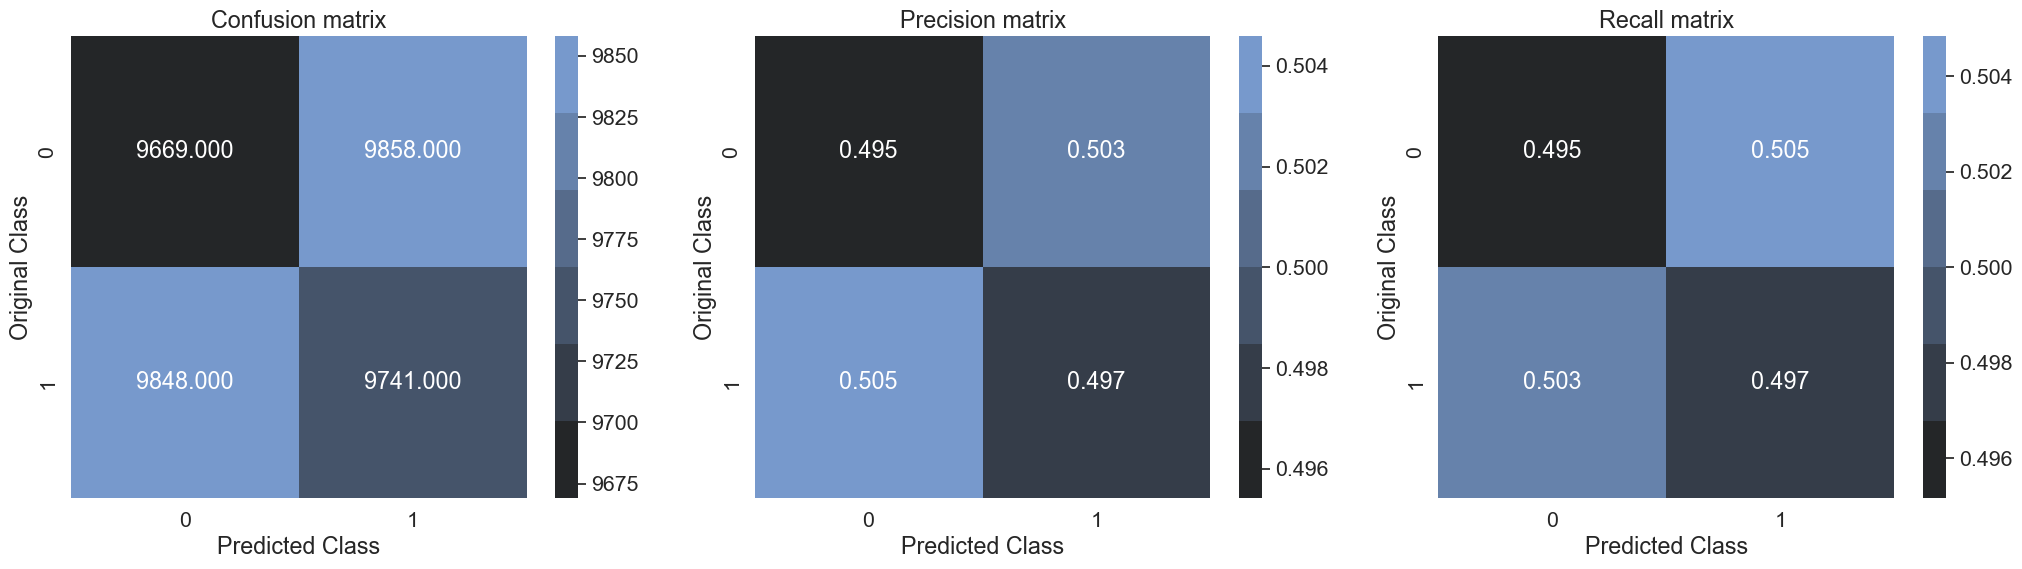

In [66]:
plot_confusion_matrix(y_test, np.argmax(predicted_y, axis=1))

In [67]:
print('AUC Score on Test data using Random Model : ', roc_auc_score(y_test, predicted_y[:,1]))
print('F1 Score on Test data using Random Model : ',f1_score(y_test, np.argmax(predicted_y, axis=1)))

AUC Score on Test data using Random Model :  0.4975093395372095
F1 Score on Test data using Random Model :  0.4971419822394611


---

## 7.2 Logistic Regression

In [68]:
param = {'C': [10 ** x for x in range(-5, 2)],
          'penalty': ['l1', 'l2']}

lr = LogisticRegression(n_jobs=-1, random_state=42)
model = GridSearchCV(lr, param, scoring='roc_auc', n_jobs=-1, cv=3, return_train_score=True)
model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='roc_auc')

In [69]:
print(model.best_params_)

{'C': 0.0001, 'penalty': 'l2'}


In [70]:
lr=LogisticRegression(C= 0.0001, penalty='l2', random_state=42, n_jobs=-1)

clb_lr_clf = CalibratedClassifierCV(lr, method='sigmoid', n_jobs=-1)
clb_lr_clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LogisticRegression(C=0.0001, n_jobs=-1,
                                                         random_state=42),
                       n_jobs=-1)

In [71]:
predict_y_train = clb_lr_clf.predict_proba(X_train)
predict_y_test = clb_lr_clf.predict_proba(X_test)

print('Log Loss on Training data using Logistic Regression: ', log_loss(y_train, predict_y_train))
print('Log Loss on Test data using Logistic Regression: ', log_loss(y_test, predict_y_test))

Log Loss on Training data using Logistic Regression:  0.5078776444461169
Log Loss on Test data using Logistic Regression:  0.5119306136165839


Train data


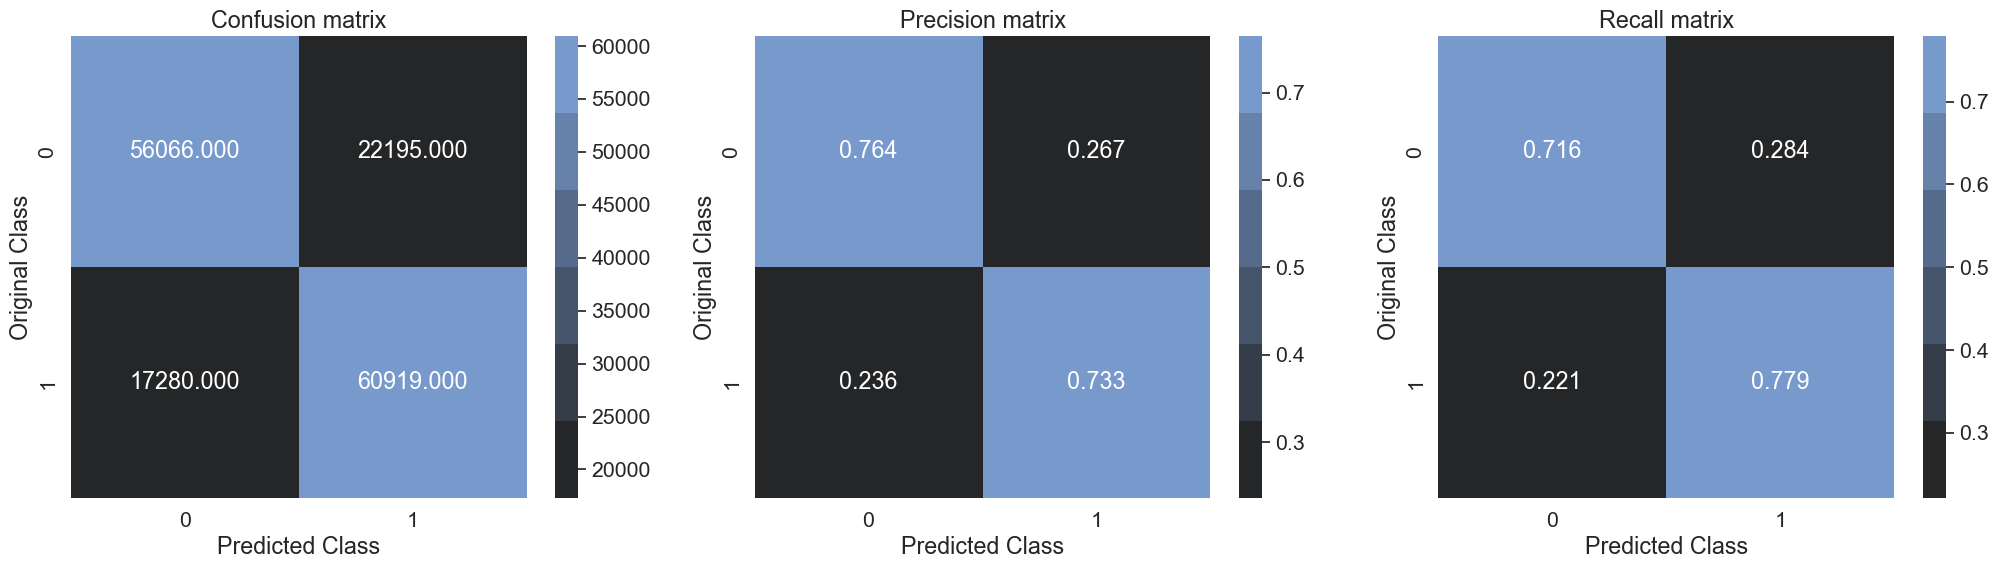

In [72]:
print('Train data')
plot_confusion_matrix(y_train, np.argmax(predict_y_train, axis=1))

Test data


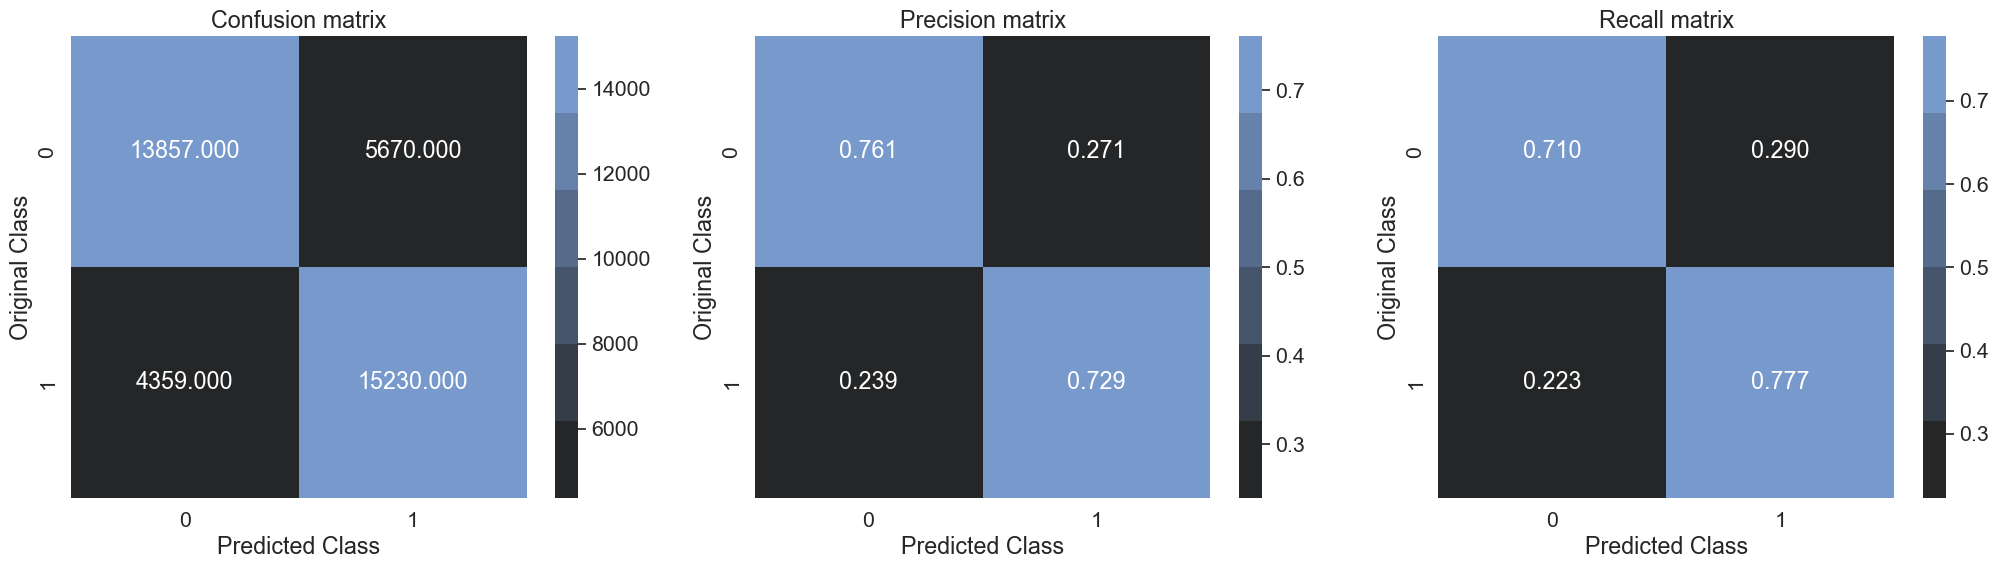

In [73]:
print('Test data')
plot_confusion_matrix(y_test, np.argmax(predict_y_test, axis=1))

In [74]:
print('AUC Score on Train data using Logistic Regression : ', roc_auc_score(y_train, predict_y_train[:,1]))
print('AUC Score on Test data using Logistic Regression : ', roc_auc_score(y_test, predict_y_test[:,1]))

AUC Score on Train data using Logistic Regression :  0.824752951390625
AUC Score on Test data using Logistic Regression :  0.8207974040653312


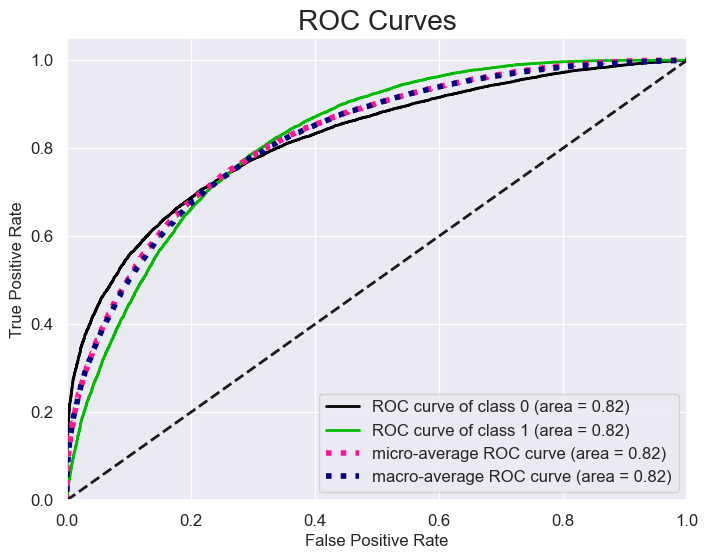

In [75]:
skplt.metrics.plot_roc_curve(y_test, predict_y_test, figsize=(8,6), text_fontsize=12)
plt.show()

In [76]:
print('F1 Score on Train data using Logistic Regression : ',f1_score(y_train, np.argmax(predict_y_train, axis=1)))
print('F1 Score on Test data using Logistic Regression : ',f1_score(y_test, np.argmax(predict_y_test, axis=1)))

F1 Score on Train data using Logistic Regression :  0.7552894063094728
F1 Score on Test data using Logistic Regression :  0.7523030946676875


---

## 7.3 Random Forest

In [ ]:
params = {'n_estimators': [200,300,500,1000],
          'max_depth': [6,8,10,12,14,16]}

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
model = GridSearchCV(rf, params, cv=3, return_train_score=True)
model.fit(X_train, y_train)

In [ ]:
print(model.best_params_)

In [31]:
rf_clf = RandomForestClassifier(n_estimators = 1000, max_depth=16, random_state=42, n_jobs = -1)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, n_estimators=1000, n_jobs=-1,
                       random_state=42)

In [36]:
z = X_train.head(1)

In [37]:
z.to_csv('quote_2.csv')

In [33]:
import pickle
pickle.dump(rf_clf, open('Model.pkl', 'wb'))

In [34]:
with open('Model.pkl', 'rb') as f:
    x = pickle.load(f)

In [35]:
print(x)

RandomForestClassifier(max_depth=16, n_estimators=1000, n_jobs=-1,
                       random_state=42)


In [78]:
rf_predicted_y_tr = rf_clf.predict_proba(X_train)
rf_predicted_y_te = rf_clf.predict_proba(X_test)

print('Log Loss on Test data using Random Forest : ', log_loss(y_test, rf_predicted_y_te))

Log Loss on Test data using Random Forest :  0.2528722732720793


Train data


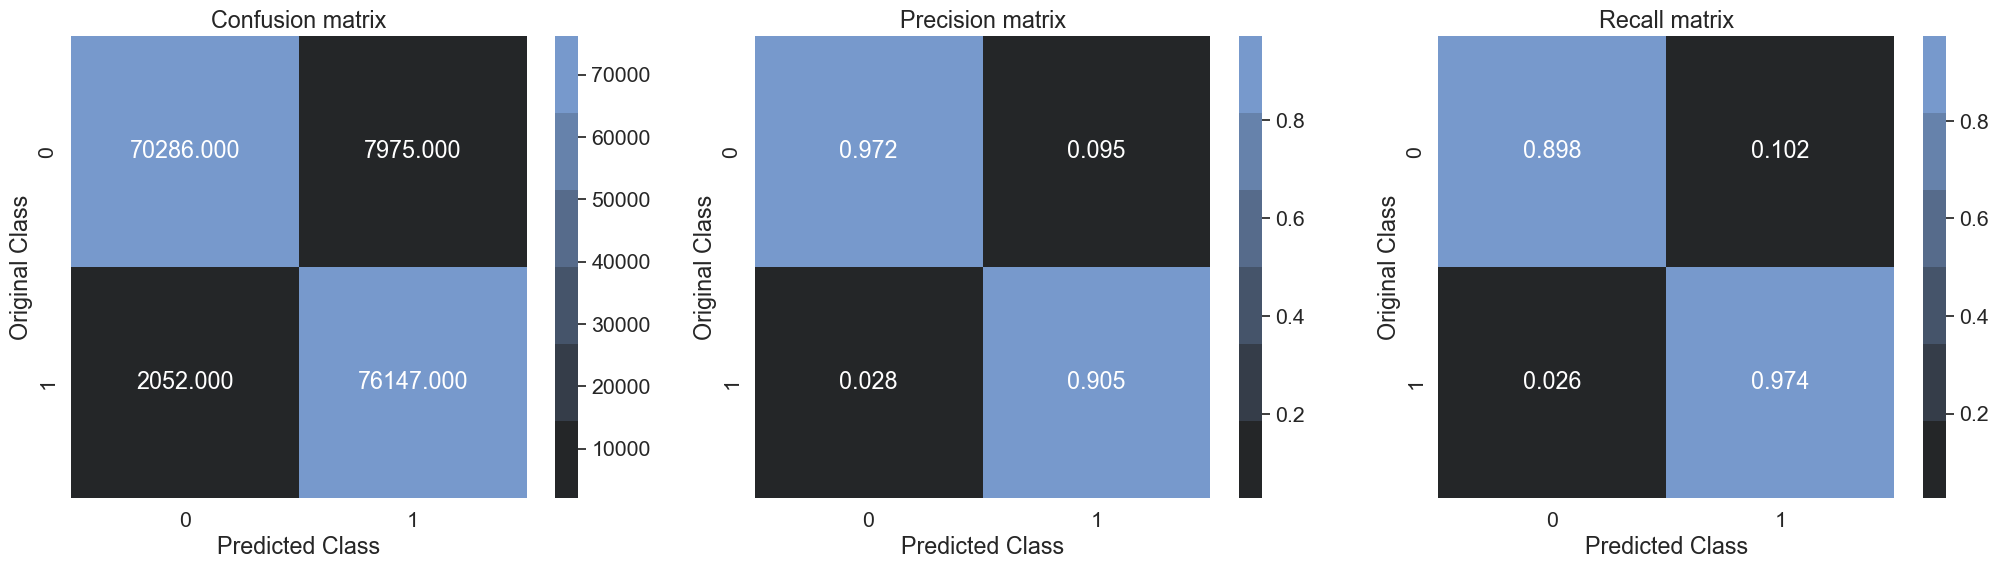

In [79]:
print('Train data')
plot_confusion_matrix(y_train, np.argmax(rf_predicted_y_tr, axis=1))

Test data


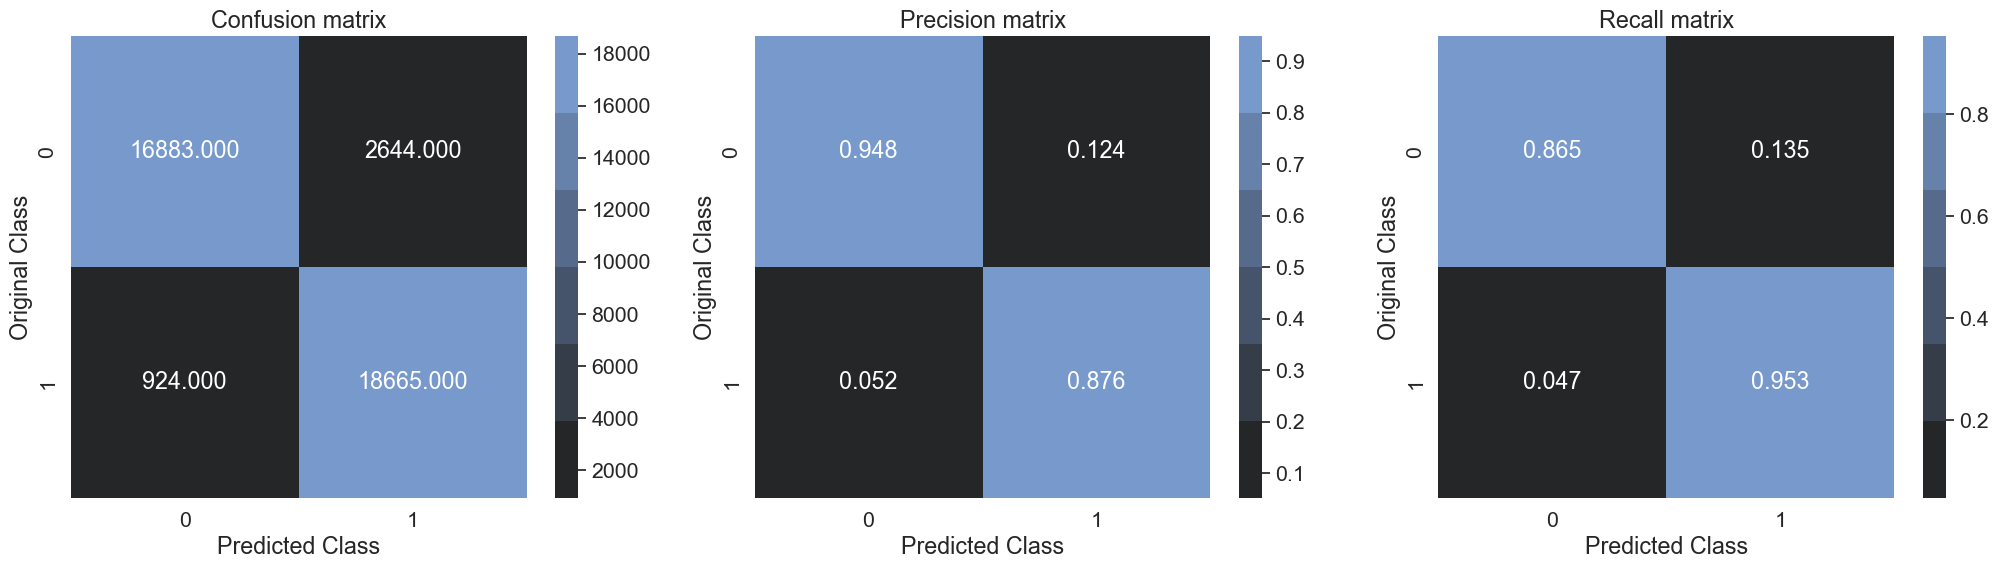

In [80]:
print('Test data')
plot_confusion_matrix(y_test, np.argmax(rf_predicted_y_te, axis=1))

In [81]:
print('AUC Score on Train data using Random Forest: ', roc_auc_score(y_train, rf_predicted_y_tr[:,1]))
print('AUC Score on Test data using Random Forest: ', roc_auc_score(y_test, rf_predicted_y_te[:,1]))

AUC Score on Train data using Random Forest:  0.9882841020595213
AUC Score on Test data using Random Forest:  0.9736808943113182


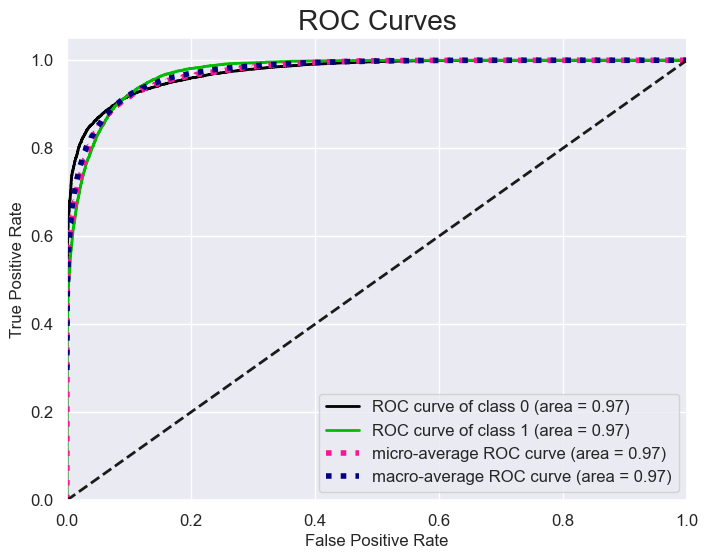

In [82]:
skplt.metrics.plot_roc_curve(y_test, rf_predicted_y_te, figsize=(8,6), text_fontsize=12)
plt.show()

In [83]:
print('F1 Score on Train data using Random Forest : ',f1_score(y_train, np.argmax(rf_predicted_y_tr, axis=1)))
print('F1 Score on Test data using Random Forest : ',f1_score(y_test, np.argmax(rf_predicted_y_te, axis=1)))

F1 Score on Train data using Random Forest :  0.9382273396541421
F1 Score on Test data using Random Forest :  0.9127585701012274


---
---

## 7.4 Random Forest + Feature Interactions

In [ ]:
#Ref: https://datascience.stackexchange.com/questions/67479/how-to-calculate-joint-feature-contribution-for-xgboost-classifier-in-python

from xgboost import XGBRegressor
import xgbfir

# doing all the XGBoost magic
xgb_model = XGBRegressor(n_estimators=400).fit(X_train, y_train)

xgbfir.saveXgbFI(xgb_model, feature_names=X_train.columns, OutputXlsxFile='FI.xlsx', TopK=120, MaxInteractionDepth=3)

joint_contrib = pd.read_csv(r'C:\Users\SVF\Downloads\Homesite_Quote_Conversion/train.csv')

xls = pd.ExcelFile('FI.xlsx')
df1 = pd.read_excel(xls, 'Interaction Depth 0')
df2 = pd.read_excel(xls, 'Interaction Depth 1')
df3 = pd.read_excel(xls, 'Interaction Depth 2')
df4 = pd.read_excel(xls, 'Interaction Depth 3')



frames = [df1, df2, df3, df4]
joint_contrib = pd.concat(frames)

joint_contrib=joint_contrib.sort_values(by='Gain', ascending=True)

In [84]:
features =  ['SalesField5', 'PersonalField9', 'PropertyField37', 'PropertyField29', 'SalesField1B', 'PersonalField1', 'PersonalField2',
'PersonalField10B', 'CoverageField8', 'SalesField1A', 'PersonalField82', 'PersonalField12', 'PropertyField34','PersonalField10A',
'PersonalField27', 'SalesField4', 'SalesField6', 'PersonalField84', 'SalesField10', 'SalesField3', 'PropertyField35', 'Field7',
'SalesField2B', 'PersonalField4A', 'PersonalField13', 'PersonalField15', 'CoverageField6A', 'Field9', 'CoverageField11B',
'PersonalField11', 'SalesField2A','PersonalField16', 'GeographicField5B', 'PropertyField16A', 'PersonalField26','PersonalField17',
'CoverageField9', 'PropertyField39A', 'CoverageField11A', 'GeographicField59A', 'PropertyField33', 'PropertyField2B', 'Field8',
'PersonalField4B', 'PropertyField1A', 'GeographicField1A', 'PersonalField18', 'GeographicField20A', 'GeographicField60B','GeographicField3A',
'PersonalField19', 'GeographicField39A', 'GeographicField28B', 'CoverageField5A', 'Field6', 'GeographicField20B',
'PropertyField24A', 'GeographicField29A', 'GeographicField57A', 'PropertyField7', 'GeographicField61B', 'GeographicField18B',
'PropertyField39B', 'GeographicField4A', 'GeographicField23B', 'PropertyField27', 'PropertyField26A', 'GeographicField33A',
'GeographicField40B', 'GeographicField58A', 'GeographicField34A', 'PersonalField14', 'GeographicField32A', 'PropertyField16B',
'GeographicField56B', 'GeographicField37A', 'GeographicField30B', 'GeographicField42A', 'GeographicField37B', 'GeographicField19A',
'PropertyField15', 'PersonalField5', 'GeographicField39B', 'GeographicField44A', 'GeographicField33B', 'SalesField12',
'GeographicField49A', 'CoverageField1A', 'GeographicField51A', 'GeographicField4B', 'GeographicField32B', 'PropertyField1B',
'CoverageField3A', 'GeographicField31A', 'SalesField11', 'GeographicField46A', 'GeographicField2B', 'GeographicField9A', 'GeographicField43B',
'GeographicField62B', 'GeographicField35A', 'GeographicField53A', 'GeographicField24A', 'GeographicField48A',
'GeographicField50A', 'GeographicField57B', 'PropertyField26B', 'CoverageField3B', 'GeographicField8A', 'GeographicField42B',
'GeographicField40A', 'SalesField7', 'GeographicField35B', 'GeographicField36B', 'GeographicField46B', 'GeographicField2A',
'GeographicField21B', 'GeographicField28A', 'PersonalField28', 'GeographicField38B', 'PropertyField29_nan', 'PersonalField84_nan',
'Negative', 'Positive', 'WEEKDAY', 'Month', 'Year', 'Day_of_Week', 'Quarter']


x_tr = pd.DataFrame(data=X_train, columns=features)
x_te = pd.DataFrame(data=X_test, columns=features)
d_test = pd.DataFrame(data=d_te, columns=features)

In [85]:
interactions2way = [
        ('PersonalField9', 'SalesField5'),
        ('PropertyField29', 'SalesField5'),
        ('PersonalField9', 'PropertyField37'),
        ('PropertyField29', 'PropertyField37'),
        ('PersonalField13', 'PersonalField9'),
        ('PropertyField37', 'SalesField1A'),
        ('PersonalField9', 'PropertyField29'),
        ('PersonalField1', 'PropertyField29'),
        ('PropertyField29', 'SalesField1B'),
        ('PersonalField1', 'SalesField1B'),
        ('PropertyField37', 'SalesField1B'),
        ('PersonalField27', 'SalesField5'),
        ('PersonalField1', 'PersonalField2'),
        ('PersonalField9', 'SalesField1B'),
        ('PersonalField1', 'PersonalField9'),
        ('GeographicField39A', 'PersonalField9'),
        ('PersonalField12', 'SalesField1B'),
        ('CoverageField8', 'PersonalField1'),
        ('PropertyField35', 'PropertyField37'),
        ('PersonalField26', 'SalesField5'),
        ('SalesField1A', 'SalesField1B'),
        ('PersonalField10B', 'PersonalField9'),
        ('PersonalField9', 'SalesField4'),
        ('CoverageField8', 'PropertyField34')
]

interactions3way = [
        ('PersonalField9', 'PropertyField29', 'PropertyField37'),
        ('PersonalField9', 'PropertyField37', 'SalesField5'),
        ('PersonalField9', 'PropertyField29', 'SalesField5'),
        ('PersonalField13', 'PersonalField9', 'SalesField5'),
        ('PersonalField9', 'PropertyField37', 'SalesField1A'),
        ('PersonalField13', 'PersonalField9', 'PropertyField1A'),
        ('PersonalField1', 'PropertyField29', 'PropertyField37'),
        ('PersonalField1', 'PropertyField29', 'SalesField1B'),
        ('CoverageField1A', 'PropertyField29', 'PropertyField37'),
        ('PropertyField29', 'PropertyField37', 'SalesField1B'),
        ('PersonalField13', 'PersonalField9', 'SalesField2B'),
        ('GeographicField39A', 'PersonalField9', 'SalesField5'),
        ('PersonalField9', 'PersonalField9', 'PropertyField37'),
        ('PersonalField1', 'PersonalField2', 'PropertyField29'),
        ('PersonalField82', 'PersonalField9', 'PropertyField37'),
        ('PersonalField10B', 'PersonalField9', 'PropertyField37'),
        ('PersonalField1', 'PersonalField9', 'SalesField5'),
        ('PersonalField9', 'PropertyField37', 'SalesField1B'),
        ('PersonalField13', 'PersonalField9', 'SalesField6'),
        ('PersonalField9', 'SalesField4', 'SalesField5'),
        ('PersonalField9', 'PropertyField35', 'PropertyField37'),
        ('PersonalField27', 'SalesField1B', 'SalesField5'),
        ('PersonalField12', 'PropertyField37', 'SalesField1B'),
        ('PropertyField29', 'SalesField1A', 'SalesField1B'),
        ('PersonalField27', 'SalesField2B', 'SalesField5')
]

interactions4way = [
        ('PersonalField9', 'PropertyField29', 'PropertyField37', 'SalesField5'),
        ('PersonalField13', 'PersonalField9', 'PropertyField1A', 'SalesField5'),
        ('PersonalField13', 'PersonalField9', 'SalesField2B', 'SalesField5'),
        ('CoverageField1A', 'PersonalField9', 'PropertyField29', 'PropertyField37'),
        ('PersonalField9', 'PropertyField29', 'PropertyField37', 'SalesField1B'),
        ('PersonalField1', 'PersonalField9', 'PropertyField29', 'PropertyField37'),
        ('PersonalField1', 'PropertyField29', 'PropertyField37', 'SalesField1B'),
        ('PersonalField13', 'PersonalField9', 'SalesField5', 'SalesField6'),
        ('PersonalField9', 'PropertyField29', 'PropertyField37', 'SalesField1A'),
        ('PersonalField1', 'PersonalField2', 'PropertyField29', 'PropertyField37'),
        ('PersonalField9', 'PersonalField9', 'PropertyField37', 'SalesField1A'),
        ('PersonalField9', 'PersonalField9', 'PropertyField29', 'PropertyField37'),
        ('PersonalField82', 'PersonalField9', 'PersonalField9', 'PropertyField37'),
        ('GeographicField29A', 'PersonalField13', 'PersonalField9', 'SalesField2B'),
        ('PersonalField13', 'PersonalField61', 'PersonalField9', 'SalesField2B'),
        ('PersonalField10B', 'PersonalField9', 'PersonalField9', 'PropertyField37'),
        ('GeographicField39A', 'PersonalField9', 'SalesField2B', 'SalesField5'),
        ('Field7', 'GeographicField39A', 'PersonalField9', 'SalesField5'),
        ('CoverageField8', 'PersonalField1', 'PersonalField9', 'SalesField5'),
        ('PropertyField29', 'PropertyField37', 'SalesField1A', 'SalesField1B'),
        ('PersonalField1', 'PersonalField9', 'PropertyField29', 'SalesField5'),
        ('PersonalField12', 'PersonalField9', 'PropertyField37', 'SalesField1B'),
        ('PersonalField82', 'PersonalField9', 'PropertyField37', 'SalesField1B'),
        ('PersonalField13', 'PersonalField9', 'PropertyField27', 'SalesField6'),
        ('PersonalField13', 'PersonalField9', 'SalesField10', 'SalesField6'),
        ('PersonalField1', 'PersonalField9', 'SalesField4', 'SalesField5'),
        ('PersonalField9', 'PropertyField32', 'SalesField4', 'SalesField5')
]

interactions5way = [
        ('Field7', 'PersonalField9', 'PropertyField29', 'PropertyField37', 'SalesField5'),
        ('CoverageField1A', 'PersonalField9', 'PropertyField29', 'PropertyField37', 'SalesField5'),
        ('PersonalField9', 'PropertyField29', 'PropertyField37', 'SalesField1A', 'SalesField5'),
        ('PersonalField1', 'PersonalField9', 'PropertyField29', 'PropertyField37', 'SalesField5'),
        ('PersonalField9', 'PersonalField9', 'PropertyField29', 'PropertyField37', 'SalesField5'),
        ('PersonalField13', 'PersonalField9', 'PropertyField19', 'PropertyField27', 'SalesField5'),
        ('PersonalField13', 'PersonalField9', 'PropertyField27', 'SalesField5', 'SalesField6'),
        ('PersonalField1', 'PersonalField9', 'PropertyField29', 'PropertyField37', 'SalesField1B'),
        ('Field6', 'Field7', 'PersonalField9', 'PropertyField29', 'PropertyField37'),
    
]

In [86]:
res = []
for A, B in interactions2way:
    feature = "_".join([A, B])
    x_tr[feature] = X_train[A] - X_train[B]
    x_te[feature] = X_test[A] - X_test[B]
    d_test[feature] = d_te[A] - d_te[B]

for A, B, C in interactions3way:
    feature = "_".join([A, B, C])
    res += [feature]
    x_tr[feature] = X_train[A] - X_train[B] - X_train[C]
    x_te[feature] = X_test[A] - X_test[B] - X_test[C]
    d_test[feature] = d_te[A] - d_te[B] - d_te[C]
        
for A, B, C, D in interactions4way:
    feature = "_".join([A, B, C, D])
    res += [feature]
    x_tr[feature] = X_train[A] - X_train[B] - X_train[C] - X_train[D]
    x_te[feature] = X_test[A] - X_test[B] - X_test[C] - X_test[D]
    d_test[feature] = d_te[A] - d_te[B] - d_te[C] - d_te[D]
        
for A, B, C, D, E in interactions5way:
    feature = "_".join([A, B, C, D, E])
    res += [feature]
    x_tr[feature] = X_train[A] - X_train[B] - X_train[C] - X_train[D] - X_train[E]
    x_te[feature] = X_test[A] - X_test[B] - X_test[C] - X_test[D] - X_test[E]
    d_test[feature] = d_te[A] - d_te[B] - d_te[C] - d_te[D] - d_te[E]

In [ ]:
params = {'n_estimators': [300,500,1000, 1200],
          'max_depth': [10,12,14,16,18,20]}

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
model = GridSearchCV(rf, params, cv=3, return_train_score=True)
model.fit(x_tr, y_train)

In [ ]:
model.best_params_

In [87]:
rf_fi_clf = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42, n_jobs=-1)
rf_fi_clf.fit(x_tr, y_train)

RandomForestClassifier(max_depth=20, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [88]:
rf_predicted_y_tr = rf_fi_clf.predict_proba(x_tr)
rf_predicted_y_te = rf_fi_clf.predict_proba(x_te)

print('Log Loss on Train data using Random Forest + FI : ', log_loss(y_train, rf_predicted_y_tr))
print('Log Loss on Test data using Random Forest + FI : ', log_loss(y_test, rf_predicted_y_te))

Log Loss on Train data using Random Forest + FI :  0.09889819249319491
Log Loss on Test data using Random Forest + FI :  0.16565278674989617


Train data


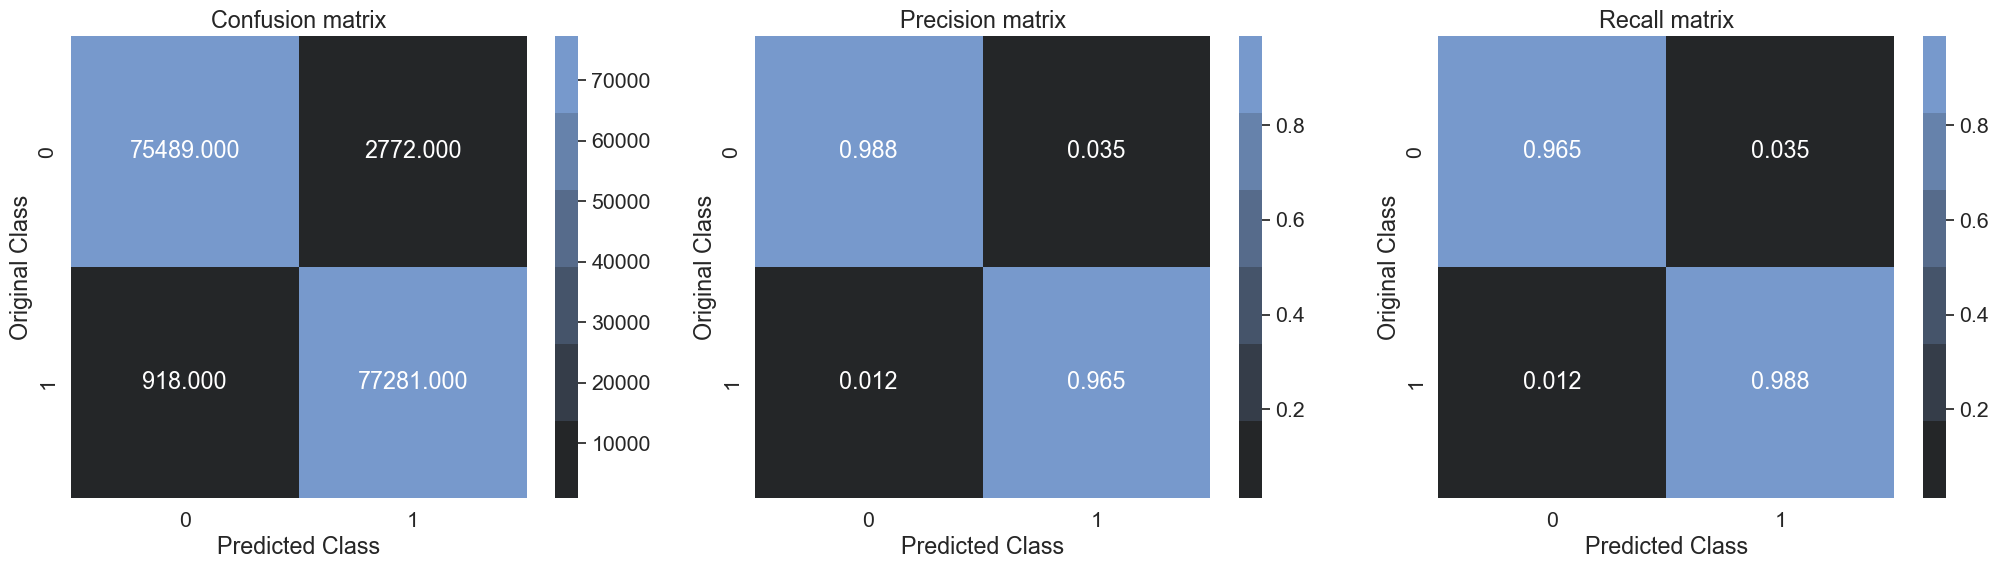

In [89]:
print('Train data')
plot_confusion_matrix(y_train, np.argmax(rf_predicted_y_tr, axis=1))

Test data


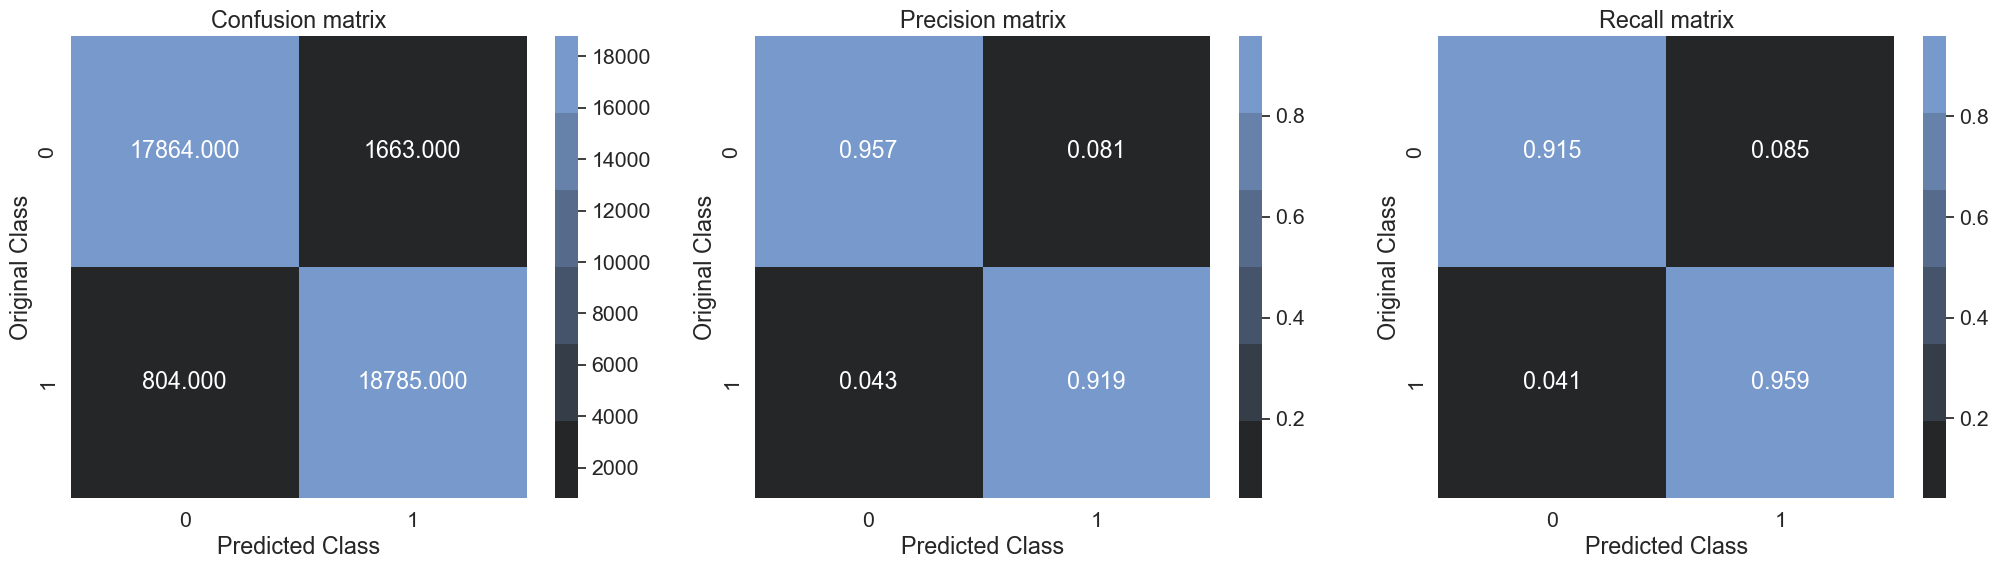

In [90]:
print('Test data')
plot_confusion_matrix(y_test, np.argmax(rf_predicted_y_te, axis=1))

In [91]:
print('AUC Score on Train data using Random Forest + FI: ', roc_auc_score(y_train, rf_predicted_y_tr[:,1]))
print('AUC Score on Test data using Random Forest + FI : ', roc_auc_score(y_test, rf_predicted_y_te[:,1]))

AUC Score on Train data using Random Forest + FI:  0.9987278966371524
AUC Score on Test data using Random Forest + FI :  0.9869493410944843


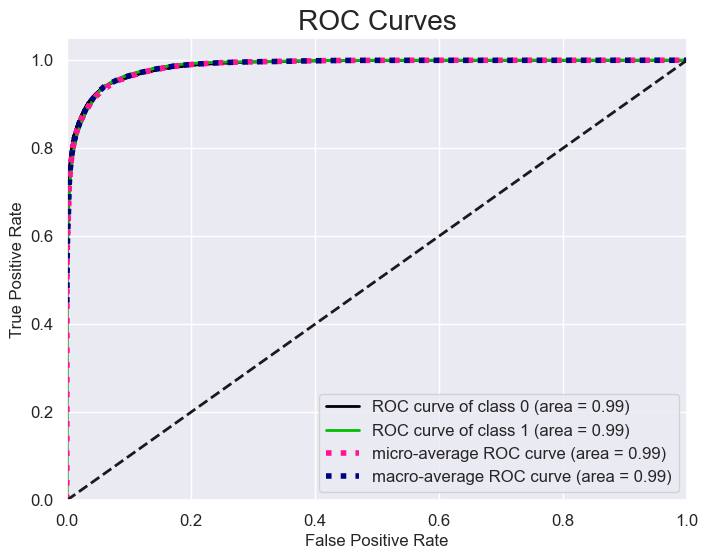

In [92]:
skplt.metrics.plot_roc_curve(y_test, rf_predicted_y_te, figsize=(8,6), text_fontsize=12)
plt.show()

In [93]:
print('F1 Score on Train data using Random Forest + FI : ',f1_score(y_train, np.argmax(rf_predicted_y_tr, axis=1)))
print('F1 Score on Test data using Random Forest + FI : ',f1_score(y_test, np.argmax(rf_predicted_y_te, axis=1)))

F1 Score on Train data using Random Forest + FI :  0.9766827591436442
F1 Score on Test data using Random Forest + FI :  0.938381996653096


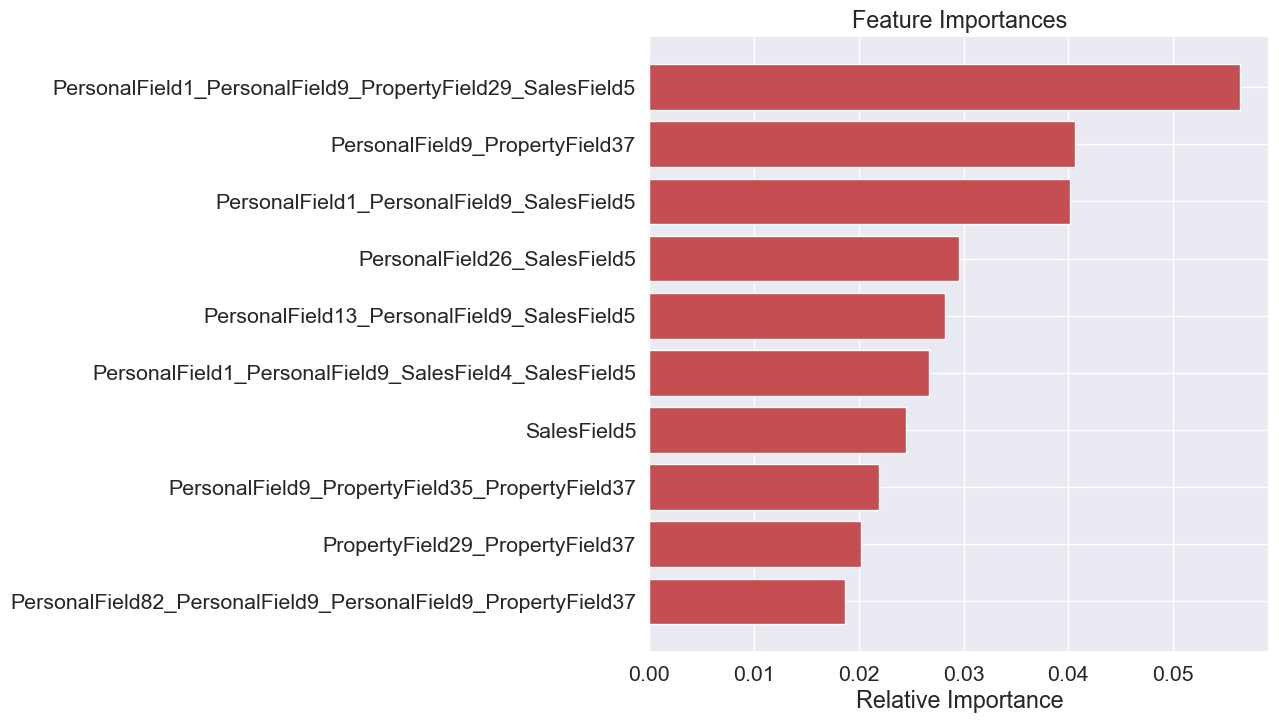

In [94]:
features = x_tr.columns
importances = rf_fi_clf.feature_importances_
indices = (np.argsort(importances))[-10:]
plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observations

- **PersonalField1_PersonalField9_PropertyField29_SalesField5** is the most important feature.
- Out of Top **10** most of the important features, **9** features are engineered features.

---

## 7.5 XGBoost Classifier

### Optuna:
Optuna is a SOTA algorithm for fine-tuning ML and Deep Learning models. It depends on the Baysian fine-tuning technique. It prunes unpromising trials which don't further improve our score and try only that combinations that improves our score overall.

##### Salient Featutes of Optuna
- Efficient search large spaces and prune unpromising trials for faster results.
- Parallelize hyperparameter searches over multiple threads of processes without modifying code.
- Automated search for optimal hyperparameters using Python conditions, loops and syntax.

In [ ]:
# Ref: https://practicaldatascience.co.uk/machine-learning/how-to-use-optuna-for-xgboost-hyperparameter-tuning
# Ref: https://www.kaggle.com/code/hamzaghanmi/xgboost-catboost-using-optuna

def objective(trial, data=X_train, target=y_train):
    """The purpose of this function is hyperparameter tuning using optuna """

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'eta': trial.suggest_float('eta', 0.01, 1.0)
    }

    # Fit the model
    model = XGBClassifier(objective='binary:logistic', **params, random_state=42, n_jobs=-1, tree_method='gpu_hist')
    
    score = cross_val_score(model, data, target, scoring='roc_auc', n_jobs=-1, cv=4).mean()

    return score

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

In [ ]:
res = study.best_params
res

{'max_depth': 7,
 'learning_rate': 0.16109256866099858,
 'n_estimators': 1995,
 'subsample': 0.6873534064963681,
 'colsample_bytree': 0.936947145889342}

In [32]:
xgb_clf = XGBClassifier(colsample_bytree=0.9369, learning_rate=0.1610, max_depth=7, n_estimators=1995, subsample=0.6873, random_state=42, n_jobs=-1, use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9369,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.161, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1995, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [33]:
import pickle
pickle.dump(xgb_clf, open('model.pkl', 'wb'))

In [37]:
b = X_test.tail(1)
b.to_excel('Quote.xlsx', header=False)

In [96]:
xgb_predicted_y_tr = xgb_clf.predict_proba(X_train)
xgb_predicted_y_te = xgb_clf.predict_proba(X_test)

print('Log Loss on Train data using XGBoost Classifier : ', log_loss(y_train, xgb_predicted_y_tr))
print('Log Loss on Test data using XGBoost Classifier : ', log_loss(y_test, xgb_predicted_y_te))

Log Loss on Train data using XGBoost Classifier :  0.002025354312011625
Log Loss on Test data using XGBoost Classifier :  0.1417561559107584


Train data


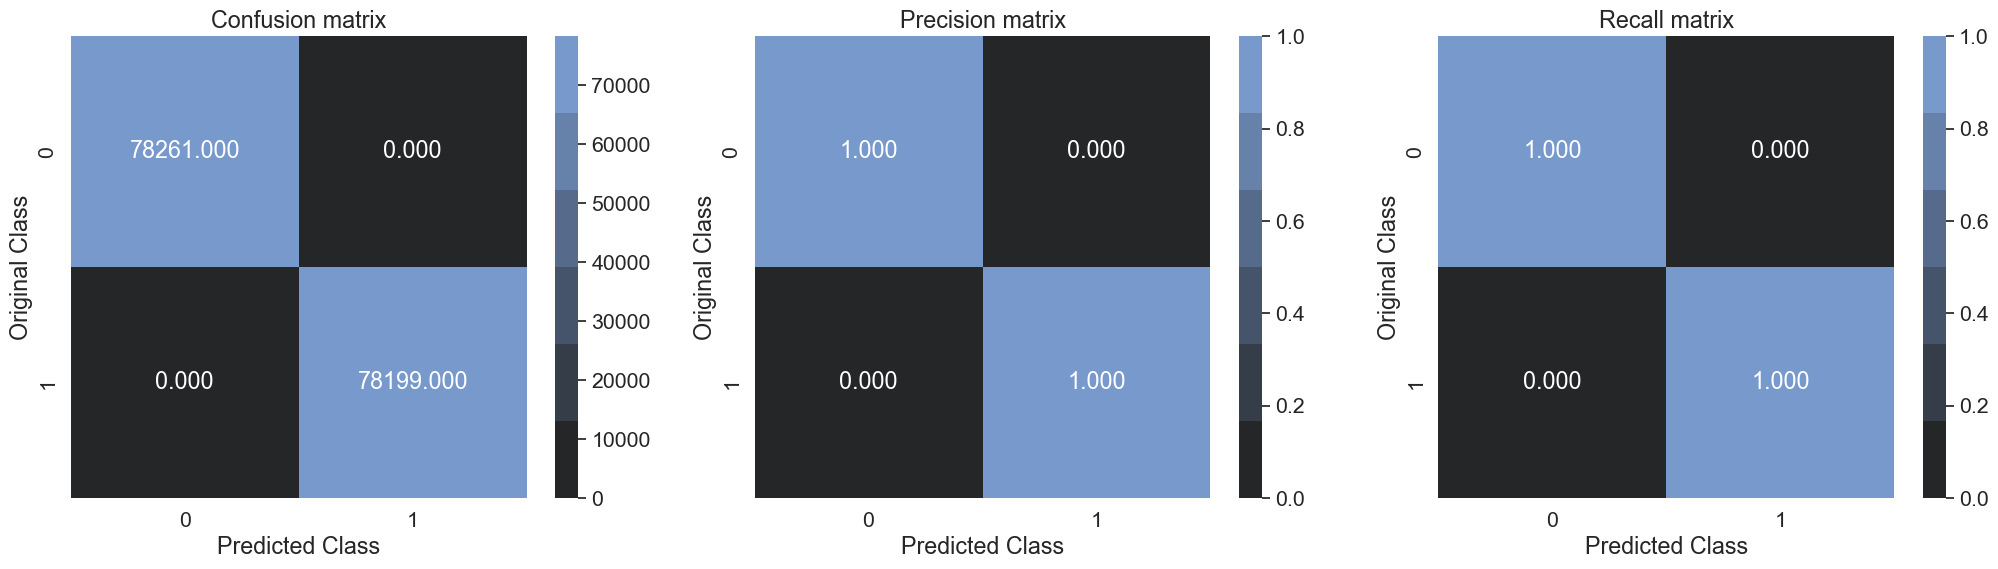

In [97]:
print('Train data')
plot_confusion_matrix(y_train, np.argmax(xgb_predicted_y_tr, axis=1))

Test data


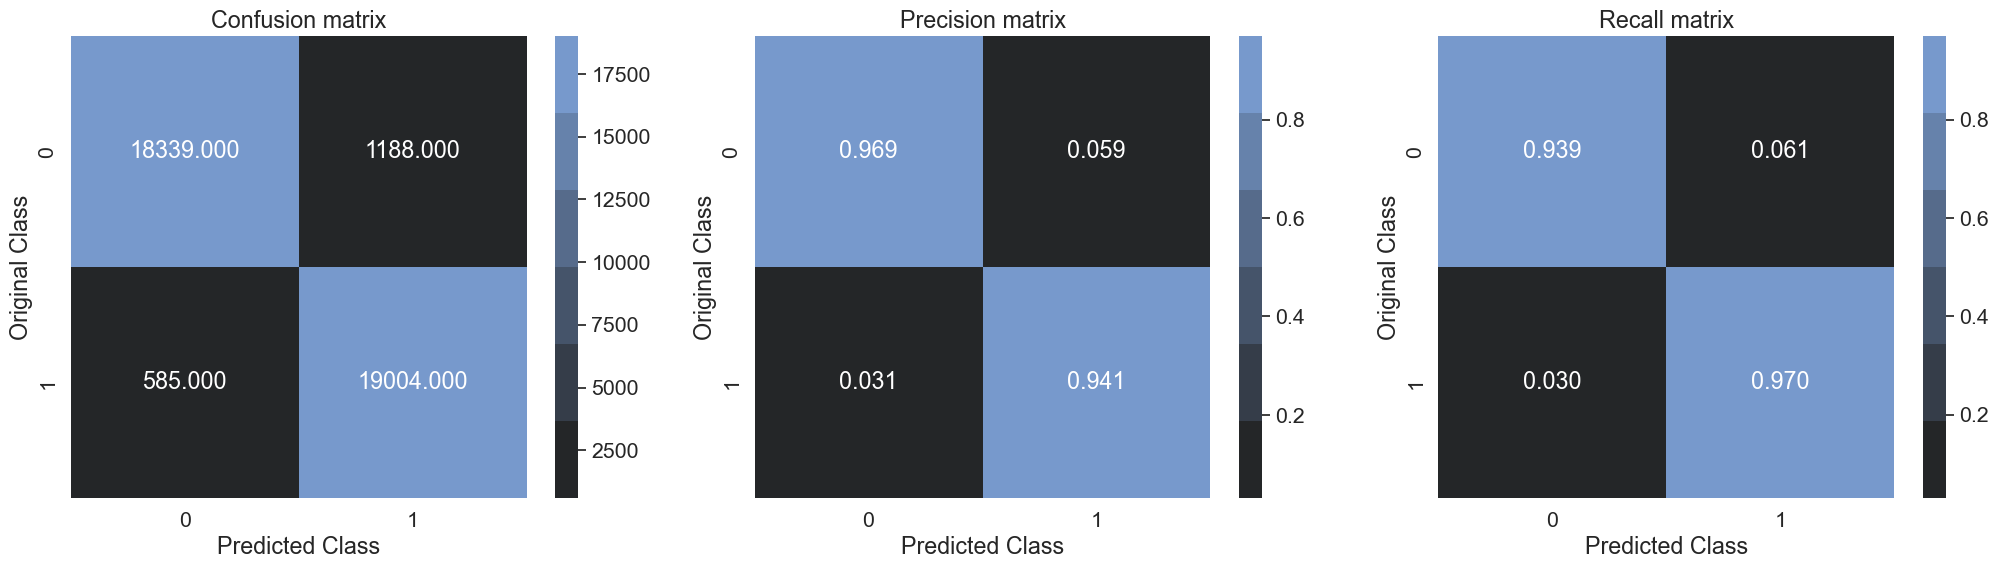

In [98]:
print('Test data')
plot_confusion_matrix(y_test, np.argmax(xgb_predicted_y_te, axis=1))

In [99]:
print('AUC Score on Train data using XGBoost Classifier: ', roc_auc_score(y_train, xgb_predicted_y_tr[:,1]))
print('AUC Score on Test data using XGBoost Classifier: ', roc_auc_score(y_test, xgb_predicted_y_te[:,1]))

AUC Score on Train data using XGBoost Classifier:  1.0
AUC Score on Test data using XGBoost Classifier:  0.991794524662644


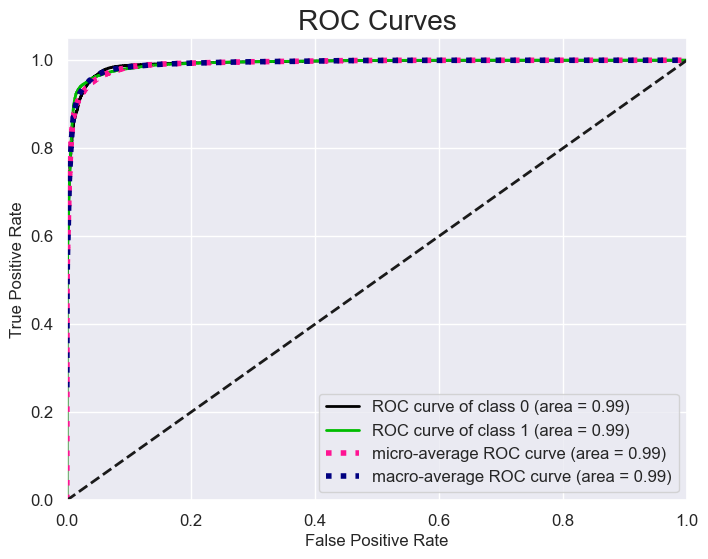

In [100]:
skplt.metrics.plot_roc_curve(y_test, xgb_predicted_y_te, figsize=(8,6), text_fontsize=12)
plt.show()

In [101]:
print('F1 Score on Train data using XGBoost Classifier : ',f1_score(y_train, np.argmax(xgb_predicted_y_tr, axis=1)))
print('F1 Score on Test data using XGBoost Classifier: ',f1_score(y_test, np.argmax(xgb_predicted_y_te, axis=1)))

F1 Score on Train data using XGBoost Classifier :  1.0
F1 Score on Test data using XGBoost Classifier:  0.9554309846409089


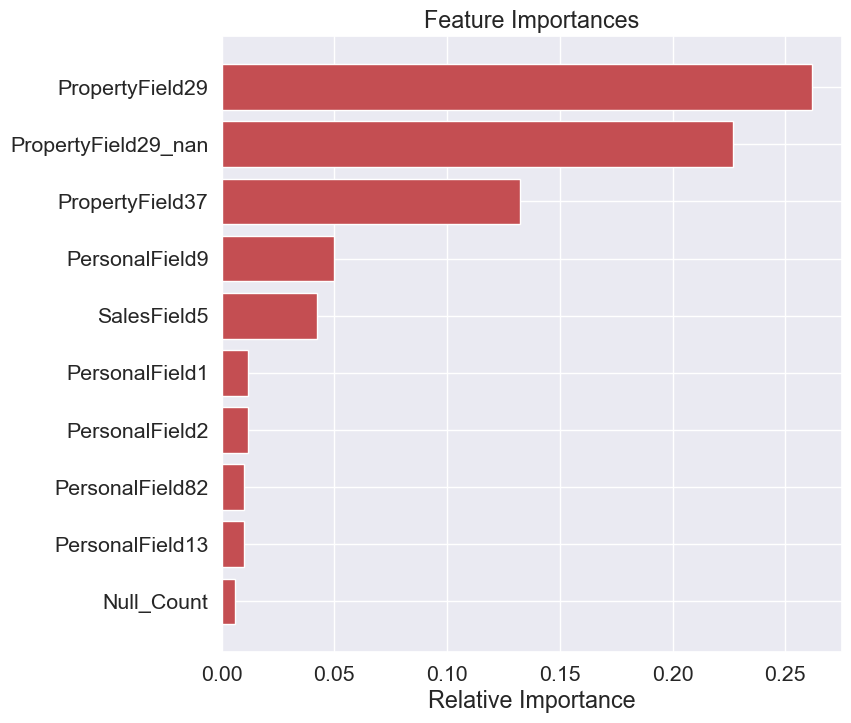

In [102]:
features = X_train.columns
importances = xgb_clf.feature_importances_
indices = (np.argsort(importances))[-10:]
plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observations

- **PropertyField29** is the most important feature.
- **PropertyField29** and **PropertyField37** has comparatively high importance value than other features.


In [119]:
import pickle

pickle.dump(xgb_clf, open('deploy_model', 'wb'))

---

## 7.6 XGBoost + Feature Interactions

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

{'max_depth': 6, 'learning_rate': 0.13577396573944595, 'n_estimators': 1991, 'subsample': 0.7171339966234814, 'colsample_bytree': 0.30804634554621163}


In [106]:
xgb_fi_clf = XGBClassifier(colsample_bytree=0.3084, learning_rate=0.1358, max_depth=6, n_estimators=1991, subsample=0.7171, random_state=42, n_jobs=-1, use_label_encoder=False)
xgb_fi_clf.fit(x_tr, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3084,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1358, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1991, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [107]:
xgb_fi_predicted_y_tr = xgb_fi_clf.predict_proba(x_tr)
xgb_fi_predicted_y_te = xgb_fi_clf.predict_proba(x_te)

print('Log Loss on Train data using XGBoost Classifier + FI : ', log_loss(y_train, xgb_fi_predicted_y_tr))
print('Log Loss on Test data using XGBoost Classifier + FI : ', log_loss(y_test, xgb_fi_predicted_y_te))

Log Loss on Train data using XGBoost Classifier + FI :  0.014957318082969037
Log Loss on Test data using XGBoost Classifier + FI :  0.12656025586238334


In [108]:
print('AUC Score on Train data using XGBoost Classifier + FI : ', roc_auc_score(y_train, xgb_fi_predicted_y_tr[:,1]))
print('AUC Score on Test data using XGBoost Classifier + FI : ', roc_auc_score(y_test, xgb_fi_predicted_y_te[:,1]))

AUC Score on Train data using XGBoost Classifier + FI :  0.9999999975489924
AUC Score on Test data using XGBoost Classifier + FI :  0.9907502450306426


In [109]:
print('F1 Score on Train data using XGBoost Classifier + FI : ',f1_score(y_train, np.argmax(xgb_fi_predicted_y_tr, axis=1)))
print('F1 Score on Test data using XGBoost Classifier + FI : ',f1_score(y_test, np.argmax(xgb_fi_predicted_y_te, axis=1)))

F1 Score on Train data using XGBoost Classifier + FI :  0.9999744245524297
F1 Score on Test data using XGBoost Classifier + FI :  0.9545306347653801


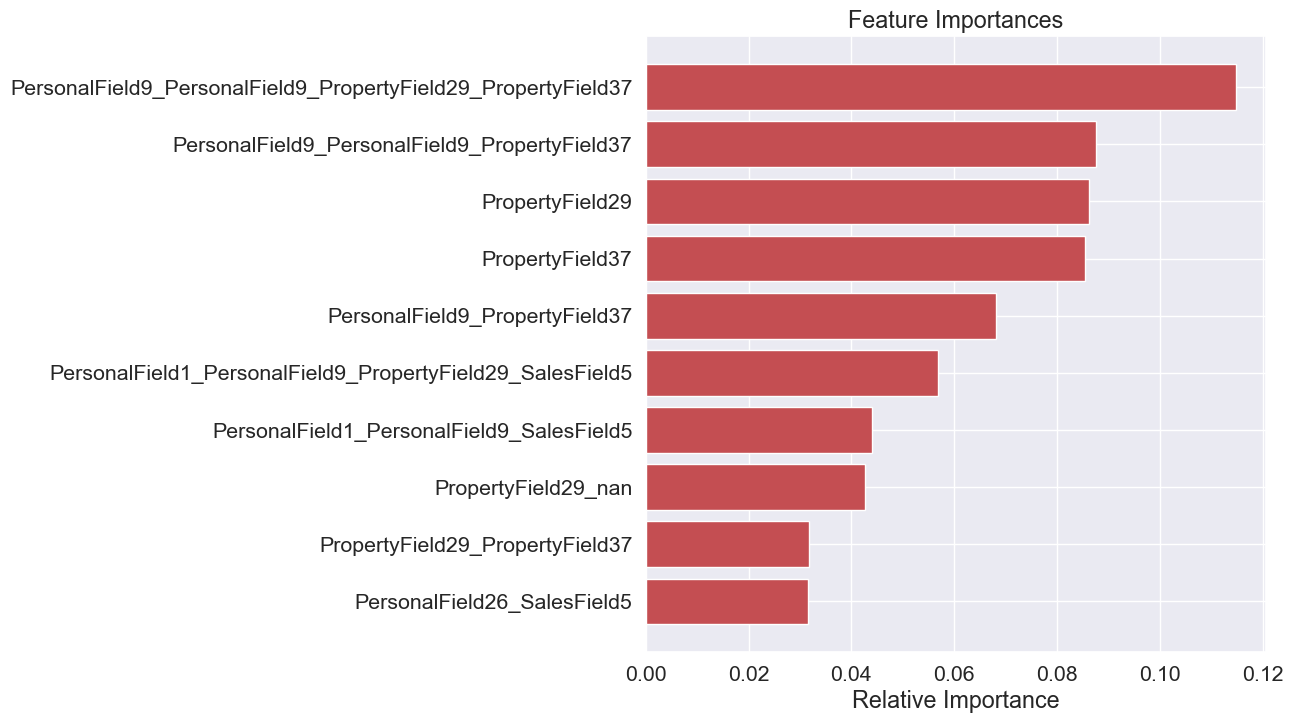

In [110]:
features = x_tr.columns
importances = xgb_fi_clf.feature_importances_
indices = (np.argsort(importances))[-10:]
plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observations

- **PersonalField9_PersonalField9_PropertyField29_PropertyField37** is the most important feature.
- Out of **10** most important features, **8** features are engineered features

In [111]:
import joblib

joblib.dump(xgb_fi_clf, 'xgbficlassifier.pkl')

['xgbficlassifier.pkl']

---

# 8. Different ML Model Performance Summary

In [112]:
Table = PrettyTable()
Table.field_names = ['Model', 'Test ROC_AUC Score', 'Test F1 Score', 'Test Log-Loss']

Table.add_row(['Random Model', '0.5001955128994189', '0.5024326871640726', '0.8843436365755319'])
Table.add_row(['Logistic Regression', '0.821073670786718', '0.7527604179532149', '0.5115370076882533'])
Table.add_row(['Random Forest', '0.9736808943113182', '0.9127585701012274', '0.2528722732720793'])
Table.add_row(['Random Forest + Feature Interactions', '0.9869493410944843', '0.938381996653096', '0.16565278674989617'])
Table.add_row(['XGBoost', '0.9920667157205059', '0.9558224858018797', '0.13980144942933054'])
Table.add_row(['XGBoost + Feature Interactions', '0.9907502476449233', '0.9545306347653801', '0.12656025233255735'])

print(Table)

+--------------------------------------+--------------------+--------------------+---------------------+
|                Model                 | Test ROC_AUC Score |   Test F1 Score    |    Test Log-Loss    |
+--------------------------------------+--------------------+--------------------+---------------------+
|             Random Model             | 0.5001955128994189 | 0.5024326871640726 |  0.8843436365755319 |
|         Logistic Regression          | 0.821073670786718  | 0.7527604179532149 |  0.5115370076882533 |
|            Random Forest             | 0.9736808943113182 | 0.9127585701012274 |  0.2528722732720793 |
| Random Forest + Feature Interactions | 0.9869493410944843 | 0.938381996653096  | 0.16565278674989617 |
|               XGBoost                | 0.9920667157205059 | 0.9558224858018797 | 0.13980144942933054 |
|    XGBoost + Feature Interactions    | 0.9907502476449233 | 0.9545306347653801 | 0.12656025233255735 |
+--------------------------------------+---------------

In [113]:
Table = PrettyTable()
Table.field_names = ['Model', 'Kaggle Private Score', 'Kaggle Public Score']

Table.add_row(['Random Model', '-', '-'])
Table.add_row(['Logistic Regression', '0.82224', '0.82364'])
Table.add_row(['Random Forest', '0.93152', '0.93032'])
Table.add_row(['XGBoost', '0.92027', '0.92057'])

print(Table)

+---------------------+----------------------+---------------------+
|        Model        | Kaggle Private Score | Kaggle Public Score |
+---------------------+----------------------+---------------------+
|     Random Model    |          -           |          -          |
| Logistic Regression |       0.82224        |       0.82364       |
|    Random Forest    |       0.93152        |       0.93032       |
|       XGBoost       |       0.92027        |       0.92057       |
+---------------------+----------------------+---------------------+
